In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Environment setup

### Library preparation

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df
from JJ_data_processing import xy_by_id,extract_Isw_R0_by_id

from JJformulas import *
from meas_util import *
from JJcalc import JJpar

from JJmeasurement import *

C:\ProgramData\Anaconda3\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
C:\ProgramData\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## New customized function in this experiment

WS: Please don't ask me why not use existing function, for some simple features it's actually faster to write one than making sure that I fully understand how to use the code... But yeah if we have time we should definitely go through our updated toolbox

In [4]:
def shIV_by_id(runid):
    I,V = xy_by_id(runid)
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    IVdf = pd.DataFrame(data = {'I':I, 'V':V-Vavg})
    return(IVdf)

def jump_by_id(runid, V_thres=300e-6):
    IVdf = shIV_by_id(runid)
    IVdfjump = IVdf[np.abs(IVdf.diff().V) >= V_thres]

    return(IVdfjump)

# fig,ax = plt.subplots()

# r = 138
# I, V = xy_by_id(r)
# Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
# ax.plot(I,V-Vavg,ls='-',marker='x')

# IVdfjump = jump_by_id(r, V_thres=200e-6)
# ax.plot(IVdfjump.I,IVdfjump.V,ls='none',marker='x')

# print(Blst)
# IVdfjump

# Sample discription

In [5]:
jj = JJmeas(sample = 'D085N5')
jj.db_connect()

In [6]:
# PIN ASSIGNMENT

# voltage leads:
# 3a                   3b

# current leads:
# 6b 6a 1a 5b 1b 4b 2a 2b
#   5  1  1  1  1  1  4   (number of SQUIDs in bewteen adjacent leads)
#   a  b  c  d  e  f  g   (dev label followed from Plamen's convention)

In [7]:
ZF = -10e-6
FF = 215e-6

In [8]:
swpdf.index = list(range(swpdf.shape[0]))
swpdf_backup = swpdf.copy(deep=True)
swpdf_backup

NameError: name 'swpdf' is not defined

In [ ]:
print('N5full')
display(JJpar(RN=16.525e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=14, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))
print('N5a')
display(JJpar(RN=3.704e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=4, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))
print('N5b')
display(JJpar(RN=1.296e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=1, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))
print('N5e')
display(JJpar(RN=1.281e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=1, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))
print('N5f')
display(JJpar(RN=1.299e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=1, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))
print('N5g')
display(JJpar(RN=6.243e3, sizeX=1.155e-6, sizeY=1.711e-6, metalTHK=250e-10, 
              T=20e-3, Nser=5, Npar=2, C_shunt=1e-20,
              ezread=True, EunHz=False, material = 'Al'))

# Meas

## Full IVc sanity check among devices

Isrc range is 1e-4

In [9]:
# jj.pbi(1)

<IPython.core.display.Javascript object>


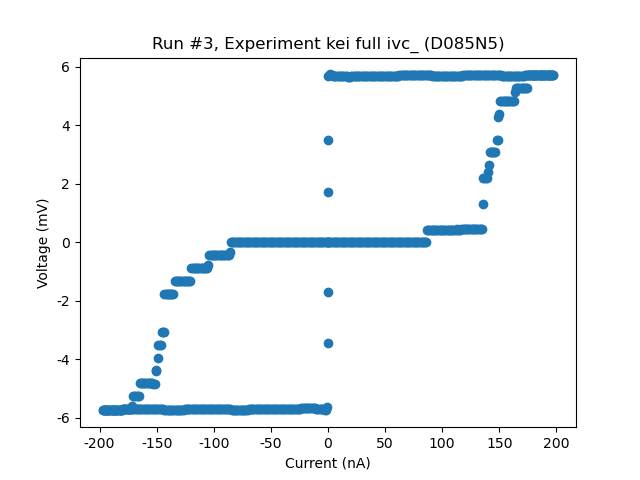

In [10]:
jj.pbi(3)

some measurements??

<IPython.core.display.Javascript object>


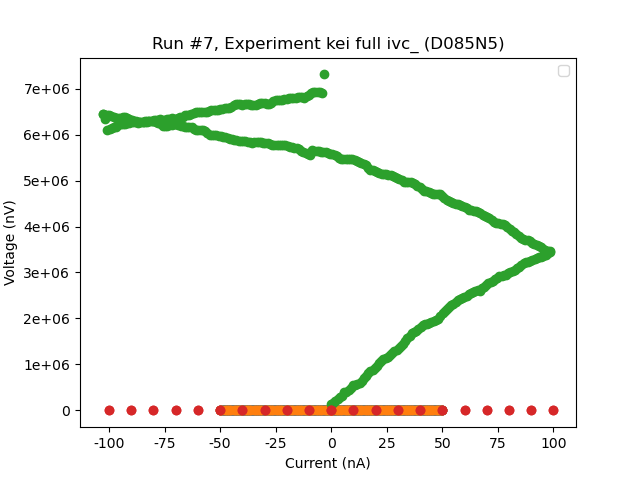

No handles with labels found to put in legend.


In [11]:
jj.bpbi(range(4, 7+1))

<IPython.core.display.Javascript object>


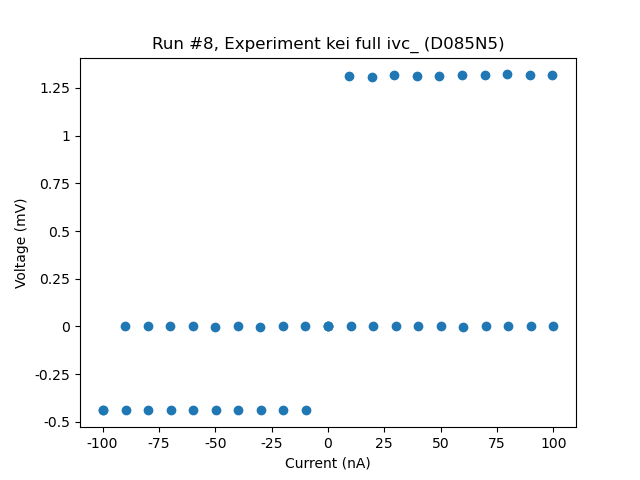

In [12]:
jj.pbi(8)

WS: qucik run after the meeting shows no response from the device.

<IPython.core.display.Javascript object>


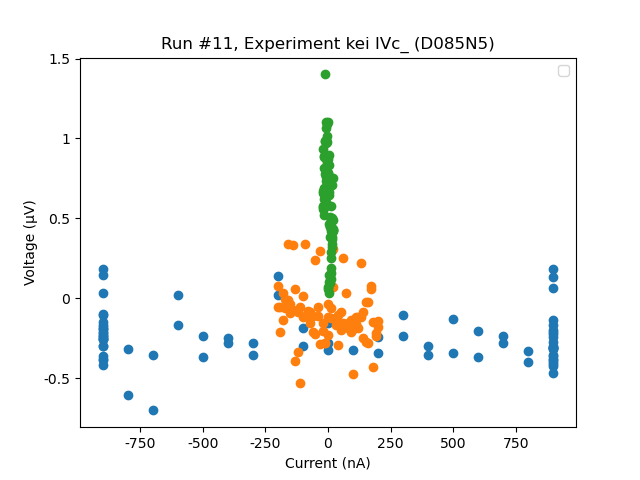

No handles with labels found to put in legend.


In [13]:
jj.bpbi(range(9,12))

WS: Ummm... no response from the device (V_sense = 0)
Is the device shunted now?
Why the I_bias range is set to 2E-4 ?? Was this done remotely? did we have shunt protection before switching the range?
Or some kinds of device reset was performed? (But a reset device shouldn't have an enabled output)

KK: Please everyone, leave some comments on your measurements, what happened btween runs 3 - 8?

WS: OK so it's just the device was shunted after run 8. Two probes results on pin 2b6b and 3ab still shows R a bit higher than 200kohm. DUT is still healthy.

The connection was a bit confusing given so many unrelated wiring inside the panel box. I removed unrelated/disconnected wiring. Also since we have effectivly 10kohm with 10Mohm+R_DUT in parallel, I guess we would be using 1E-3 as the current dividing factor. That explained the range of KEI was set to 2e-4 such that the I_bias was capped at 0.2uA.

PK: Runs 3-8 were just test IVC on the full sample with different step sizes. I shunted the sample before I left for the day.

<IPython.core.display.Javascript object>


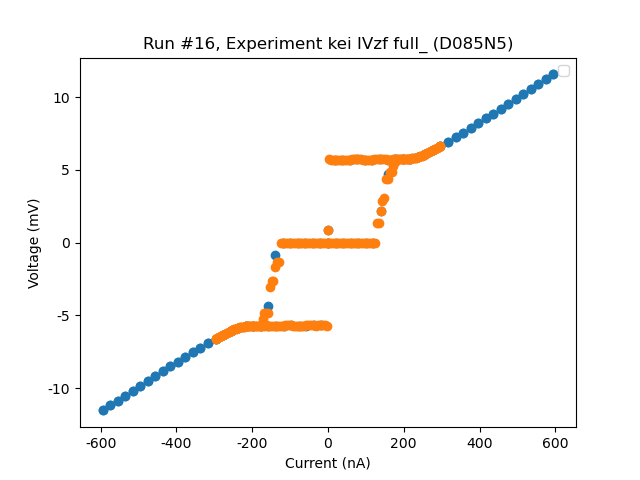

No handles with labels found to put in legend.


In [14]:
#jj.bpbi([12,13,14]) sanity check
jj.bpbi([15,16])

> WS: In runid 16, I set I_stp to be 5nA and I'm expecting 5uA I_bias coming out from KEI. But what I'm seeing from KEI screen is 1.1uA which is much smaller. How was the current dividor factor claculated?

WS: Let's qucikly check the B-field dep.

In [15]:
# nstart = 18
# devid = 'N5full'
# Blst = np.linspace(  0,2,6)*1e-4

# sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#          'Bfield': Blst,
#          'T': [63e-3]*len(Blst)}
# swpdt = pd.Series(data = sweep)

# swpdf = {'devid'  : devid,
#          'swpdata': [swpdt],
#          'desc'   : 'sanity check, B dep'}
# swpdf = pd.DataFrame(data = swpdf)

<IPython.core.display.Javascript object>


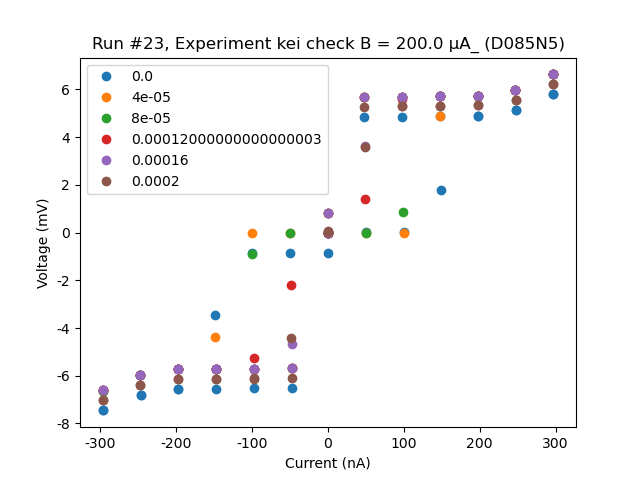

In [16]:
jj.bpbi(range(18,24), labels = np.linspace(  0,2,6)*1e-4)

In [ ]:
jj.bpbi([21,23])

WS: OK first thing is FF is still around 160uA (iirc 178uA?). Next, we can still see that the gap plateau be lifted by B-field. Let's run more careful scan around the FF point.

In [ ]:
# I accidentally set B to 1.5mA at id24, 
# so let's qucikly check if the frutstration was screwed up.
jj.bpbi([26,22])

In [17]:
# nstart = 25
# devid = 'N5full'
# Blst = np.linspace(1.5,2,6)*1e-4

# sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#          'Bfield': Blst,
#          'T': [63e-3]*len(Blst)}
# swpdt = pd.Series(data = sweep)

# swpd0 = {'devid'  : devid,
#          'swpdata': [swpdt],
#          'desc'   : 'sanity check, search FF rough'}
# swpd0 = pd.DataFrame(data = swpd0)
# swpdf = swpdf.append(swpd0)

In [ ]:
jj.bpbi(range(25,31), labels = (np.linspace(1.5,2,6)*1e-4))

WS: everyting looks alright but the field is a bit shifted. Let me be a little bit picky here and double check finer scan before we move on.

In [19]:
# nstart = 31
# devid = 'N5full'
# Blst = np.linspace(1.7,2.1,10)*1e-4

# sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#          'Bfield': Blst,
#          'T': [63e-3]*len(Blst)}
# swpdt = pd.Series(data = sweep)

# swpd0 = {'devid'  : devid,
#          'swpdata': [swpdt],
#          'desc'   : 'sanity check, search FF fine'}
# swpd0 = pd.DataFrame(data = swpd0)
# swpdf = swpdf.append(swpd0)

In [ ]:
jj.bpbi(range(31,41),marker = 'x', ls='-')#, labels = (np.linspace(1.7,2.1,10)*1e-4))

WS: ok, so everything looks fine except that the FF shited a bit. We have FF point around 1.9e-4. Now let's setup the measuremnt protocol and go through dev by dev in N5.

segName = '5full'
jj.IVC_udu (amp = 0.6e-6, stp = 20e-9, dt = .1,  N_avg = 1, 
            label = 'kei IVcZF, {}'.format(segName))

Blst = [0,1.9e-4]
jj.IVC_udu (amp = 0.3e-6, stp = 5e-9, dt = .1,  N_avg = 1, 
            label = 'kei IVf B:{}A, {}'.format(si_format(B)),segName)

WS: N5c and N5d acts funny. Also it seems that they all have different frustration point?!

> it turns out that I used incorrect pin 5a instead of 5b. will redo the meas and update rund id accordingly

In [20]:
# dic = {'full':44,'a':47,'b':50,'c':53,'d':56,'e':59,'f':62,'g':65}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = [0,0,FF]

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst),
#              'labels': ['coarse','fine_ZF','fine_FF']}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'init check_old'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

In [ ]:
N = [14,4,1,1,1,5]
fig,ax = plt.subplots()
dt = swpdf[swpdf.desc=='init check_old']
dt = dt.append(dt.iloc[0:3]).append(dt.iloc[5:]).copy(deep=True)[8:]
for i in range(dt.shape[0]):
    I,V = xy_by_id(dt.iloc[i].swpdata.runid[0])
    ax.plot(I,V,ls='none',marker='x',color='grey',alpha=0.4)
    l=len(V)
    a, b = np.polyfit(I[l//8:l//4],V[l//8:l//4],1)

    label = 'dev:{}, R={}ohm, N={}'.format(dt.iloc[i].devid, si_format(a,3), N[i])
    ax.plot(I[l//8:l//4], a*I[l//8:l//4]+b, label = label)
ax.legend(loc=3)
ax.set_xlabel('I (A)')
ax.set_ylabel('V (V)')

In [ ]:
7/1.296

In [ ]:
a = swpdf[swpdf.desc=='init check_old']

fig,ax = plt.subplots(2,1,figsize=(4,4))
ax=ax.flatten()
devlst = 'ag'
for i,v in enumerate(devlst):
    runidlst = a[a.devid=='N5'+v].swpdata.iloc[0].runid
    for r,w in enumerate(runidlst):
        jj.pbi(w, axes = ax[i], marker = 'x', ls = '-',
               color = 'C'+str(r), alpha = 0.8-0.1*i)
plt.tight_layout()

In [ ]:
a = swpdf[swpdf.desc=='init check_old']

fig,ax = plt.subplots(2,3)
ax=ax.flatten()
devlst = 'bcdef'
for i,v in enumerate(devlst):
    runidlst = a[a.devid=='N5'+v].swpdata.iloc[0].runid
    for r,w in enumerate(runidlst):
        jj.pbi(w, axes = ax[i], marker = 'x', ls = '-',
               color = 'C'+str(r), alpha = 0.8-0.1*i)

WS: ... So it's not that they have different frustration point but it's more like the "subgap" response

**Is it possible that only some of the sites suffere from the subgap response?**
> No it's just taht I used the wrong pin.

In [21]:
# dic = {'g':68,'f':77,'e':86,'d':117,'c':126, 'b':135, 'a':144} # 'full':177,
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = np.linspace(1.7,2.1,9)*1e-4

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst)}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'FF detail_old'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

In [ ]:
a = swpdf[swpdf.desc=='FF detail_old']

fig,ax = plt.subplots(2,1,figsize=(4,4))
ax=ax.flatten()
devlst = 'ga'
for i,v in enumerate(devlst):
    runidlst = a[a.devid=='N5'+v].swpdata.iloc[0].runid
    for r,w in enumerate(runidlst):
        jj.pbi(w, axes = ax[i], marker = 'x', ls = '-',
               color = 'C'+str(r), alpha = 0.8-0.1*i)
plt.tight_layout()

In [ ]:
a = swpdf[swpdf.desc=='FF detail_old']

fig,ax = plt.subplots(2,3)
ax=ax.flatten()
devlst = 'fedcb'
for i,v in enumerate(devlst):
    runidlst = a[a.devid=='N5'+v].swpdata.iloc[0].runid
    for r,w in enumerate(runidlst):
        jj.pbi(w, axes = ax[i], marker = 'x', ls = '-',
               color = 'C'+str(r), alpha = 0.8-0.1*i)

WS: Uhhhhhhh!!! I just realized that the IV leads were swapped... Should've double checked the arrangement... Redo all measurement with swapped IV lead (which is following the definition in pin assignment from now on)

runid in range(152,168) are craps. Continue on runid 168

In [ ]:
dic = {'full':,'a':168,'b':171,'c':,'d':,'e':,'f':,'g':}
for i in dic:
    nstart = dic[i]
    devid = 'N5'+i
    Blst = [ZF,ZF,FF]

    sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
             'Bfield': Blst,
             'T': [63e-3]*len(Blst),
             'labels': ['coarse','fine_ZF','fine_FF']}
    swpdt = pd.Series(data = sweep)

    swpd0 = {'devid'  : devid,
             'swpdata': [swpdt],
             'desc'   : 'init check'}
    swpd0 = pd.DataFrame(data = swpd0)
    swpdf = swpdf.append(swpd0)

WS: Let's do some stochastic and periodicity sweep on N5b tonight.

## Closer look on N5b

### Full scan

In [ ]:
jj.pbi(742, interactive = True)

In [23]:
# dic = {'b':174}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = np.linspace(-3,3,31)*FF

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst)}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'B periodicity_rough'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

In [ ]:
fig,ax = plt.subplots()

Blst = np.linspace(-3,3,31)*FF
runidlst = list(range(174,205))

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x')
ax.plot(Blst, VgapPlst, ls='none', marker='x')

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,V-V[0],ls='-',marker='x')
        ax[1].plot(I,V-Vavg,ls='-',marker='x')

In [ ]:
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.runid

I_SWlst  = []
for r in range(len(runidlst)):
    IVdfjump = jump_by_id(runidlst[r], V_thres=200e-6)
    if IVdfjump.shape[0]==4:
        I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
    else:
        I_SWlst += [np.abs(IVdfjump.I).max()]
    
ax.plot(Blst,I_SWlst,ls='-',marker='x')

###########################################################
Blst = np.linspace(-3,3,31)*FF
runidlst = list(range(174,205))

V_threslst = [320e-6, 340e-6, 350e-6]
for V_thres in V_threslst:
    I_SWlst  = []
    for r in range(len(runidlst)):
        IVdfjump = jump_by_id(runidlst[r], V_thres=V_thres)
        if IVdfjump.shape[0]==4:
            I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
        else:
            I_SWlst += [np.abs(IVdfjump.I).max()]
            
    ax.plot(Blst,I_SWlst,ls='-',marker='x',label = V_thres)
ax.legend()

WS: V_gap is fairly symmetric when aligned with len(V)//4 except around the FF point (the shift of IVc is related to SQUID frustration, why?), the same case for V_subgap.
Noise level is in general 3uV. V_gap fluctuates at a level around 6uV. (because of T8 fluctuation?)

In terms of field response, a. periodicity and b. close to ZF seems to be alright. But there is some odd features close to FF which is related to selection of V_thres (<350uV). This number indicates that these jumps are no-so-correctly-interpreted since the subgap state is messing around here.

**Does this mean that the subgap is somehow related to SQUID?**

let's do fine-scan across FF for overnight.

In [24]:
# dic = {'b':205}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = Blst = np.arange(100e-6,350e-6,5e-6)

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst)}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'B periodicity_near FF'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

In [ ]:
# 15:32
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.runid
# Blst = Blst[len(Blst)//2-10:len(Blst)//2+7]
# runidlst = runidlst[len(runidlst)//2-10:len(runidlst)//2+7]

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x',label = 'Vavg')
ax.plot(Blst, VgapPlst, ls='none', marker='x',label = 'Vgap')
ax.set_xlabel('BField (A)')
ax.set_ylabel('V (V)')
ax.legend()

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,(V),ls='-',marker='x')
        ax[1].plot(I,(V-Vavg),ls='-',marker='x')

# [len(V-Vavg)//4:3*len(V-Vavg)//4]
# [len(V-Vavg)//4:3*len(V-Vavg)//4]

In [ ]:
# 15:32
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.runid
Blst = Blst[len(Blst)//2-10:len(Blst)//2+7]
runidlst = runidlst[len(runidlst)//2-10:len(runidlst)//2+7]

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x',label = 'Vavg')
ax.plot(Blst, VgapPlst, ls='none', marker='x',label = 'Vgap')
ax.legend()

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,(V-V[0]),ls='-',marker='x')
        ax[1].plot(I,(V-Vavg),ls='-',marker='x')
ax[0].set_xlim(0-I.max()*0.1,I.max()*1.1)
ax[0].set_ylim(430e-6,450e-6)

# [len(V-Vavg)//4:3*len(V-Vavg)//4]
# [len(V-Vavg)//4:3*len(V-Vavg)//4]

In [ ]:
# 9:15 + 32:39
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.runid

Blst1 = Blst[ 9:15]
Blst2 = Blst[32:39]
Blst  = np.append(Blst1, Blst2)
runidlst1 = runidlst[ 9:15]
runidlst2 = runidlst[32:39]
runidlst  = np.append(runidlst1, runidlst2)

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x',label = 'Vavg')
ax.plot(Blst, VgapPlst, ls='none', marker='x',label = 'Vgap')
ax.legend()

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,(V-V[0]),ls='-',marker='x')
        ax[1].plot(I,(V-Vavg),ls='-',marker='x')
ax[0].set_xlim(0-I.max()*0.1,I.max()*1.1)
ax[0].set_ylim(430e-6,450e-6)

In [ ]:
# 4:9 + 39:42
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.runid

Blst1 = Blst[ 4: 9]
Blst2 = Blst[39:42]
Blst  = np.append(Blst1, Blst2)
runidlst1 = runidlst[ 4: 9]
runidlst2 = runidlst[39:42]
runidlst  = np.append(runidlst1, runidlst2)

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x',label = 'Vavg')
ax.plot(Blst, VgapPlst, ls='none', marker='x',label = 'Vgap')
ax.legend()

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,(V-V[0]),ls='-',marker='x')
        ax[1].plot(I,(V-Vavg),ls='-',marker='x')
ax[0].set_xlim(0-I.max()*0.1,I.max()*1.1)
ax[0].set_ylim(430e-6,450e-6)

In [ ]:
# :4 + 42:
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.runid

Blst1 = Blst[: 4]
Blst2 = Blst[42:]
Blst  = np.append(Blst1, Blst2)
runidlst1 = runidlst[: 4]
runidlst2 = runidlst[42:]
runidlst  = np.append(runidlst1, runidlst2)

Vavglst = []
VgapPlst = []
VgapNlst = []
for i in range(len(runidlst)):
    I, V = xy_by_id(runidlst[i])
    Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
    Vavglst += [Vavg]
    VgapPlst += [V[len(V)//4] - Vavg]
    
ax.plot(Blst, Vavglst, ls='none', marker='x',label = 'Vavg')
ax.plot(Blst, VgapPlst, ls='none', marker='x',label = 'Vgap')
ax.legend()

fig,ax = plt.subplots(1,2,figsize=(10,4))
# runidlst = [188]
for i in runidlst:
        I, V = xy_by_id(i)
        Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
        ax[0].plot(I,(V-V[0]),ls='-',marker='x')
        ax[1].plot(I,(V-Vavg),ls='-',marker='x')
ax[0].set_xlim(0-I.max()*0.1,I.max()*1.1)
ax[0].set_ylim(430e-6,450e-6)

> WS: ok so my point here was to verify the correlation between some fine features in V_gap and the switching current when entering the subgap regime. And hope we can find/be inspired from any hints.

> All IVc on LHS above in each cell is IVc shifted against V[0] accordingly, while on RHS is shifted against (V.max+V.min)/2. Nothing really different except for points near FF. ([15:32], the first cell above)

> Also, if we carefully look through we are seeing groups of data sets (as have been sepereted in each cell above) when we go across FF. There are total 4 sets of data and let's mark them (from close to FF to far away from FF) as ABCD. Data set D shows standard IVc where I_SW far away from subgap I_SW, we have repeatable plateau although some wiggling feature. 

> **Misha commented that the overheating will be main concern given that 0.1nW is already enumours.**

> Next, dataset B shows consistent result with D. Later on we will see a bit more similarities in these two set of data. Also, if we look at returning loop of IVs Dataset C and A they are having similar and repeatable wiggling during the 6hrs scan as well.

> What is bothering me is the forward scan of dataset C and A: around 100nA we are seeing another jump in V_gap state. This jump modified the inner structure of the pleatau and makes the wiggling has different "periodicity". The reason I say "structure" is because considering we ramping up the current and getting closer to but less then 100nA, if the inner structure of the gap remained the same we are expecting similar pleatau feature untill we hit the jump around 100nA. However this is not the case since the entire pleatau strucure is different once the junction switched to Vgap. It's easier to see what I meant by taking screenshots and comparing pictures side-by-side in powerpoint.

> Next measurement shows the periodicity of I_SW and we also see some weird features around FF as usual.

In [ ]:
v = 2

Blst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.Bfield
runidlst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.runid



from JJ_data_processing import xy_by_id,extract_Isw_R0_by_id

Isws = [extract_Isw_R0_by_id(rid, dy = 20e-6)[0] for rid in runidlst]


fig, ax = plt.subplots()
ax.plot(Blst, Isws, 'o')

Blst

In [ ]:
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
Bl = []
for i in [4,9,15,32,39,42]:
    Bl += [Blst[i]]
for i in Bl:
    ax.plot(i,0.4e-7,marker = 'o', color = 'C3')

lslst = ['-','-']
for i,v in enumerate([3,2]):
    Blst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.Bfield
    runidlst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.runid

    I_SWlst  = []
    for r in range(len(runidlst)):
        IVdfjump = jump_by_id(runidlst[r], V_thres=50e-6)
        if IVdfjump.shape[0]==4:
            I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
        else:
            I_SWlst += [np.abs(IVdfjump.I).max()]

    ax.plot(Blst,I_SWlst,ls=lslst[i],marker='x')
ax.annotate('D',(0.00010,4e-8),color = 'C3')
ax.annotate('C',(0.00013,4e-8),color = 'C3')
ax.annotate('B',(0.00015,5e-8),color = 'C3')
ax.annotate('A',(0.00021,4e-8),color = 'C3')
ax.annotate('B',(0.00027,5e-8),color = 'C3')
ax.annotate('C',(0.00030,5e-8),color = 'C3')
ax.annotate('D',(0.00032,4e-8),color = 'C3')
ax.set_xlabel('Bfield (A)')
ax.set_ylabel('I_SW (A)')

In [ ]:
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
Bl = []
for i in [4,9,15,32,39,42]:
    Bl += [Blst[i]]
for i in Bl:
    ax.plot(i,0.4e-7,marker = 'o', color = 'C3')

lslst = ['-','-']
for i,v in enumerate([3,2]):
    Blst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.Bfield
    runidlst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.runid

    I_SWlst  = []
    for r in range(len(runidlst)):
        IVdfjump = jump_by_id(runidlst[r], V_thres=200e-6)
        if IVdfjump.shape[0]==4:
            I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
        else:
            I_SWlst += [np.abs(IVdfjump.I).max()]

    ax.plot(Blst,I_SWlst,ls=lslst[i],marker='x')
ax.annotate('D',(0.00010,4e-8),color = 'C3')
ax.annotate('C',(0.00013,4e-8),color = 'C3')
ax.annotate('B',(0.00015,5e-8),color = 'C3')
ax.annotate('A',(0.00021,4e-8),color = 'C3')
ax.annotate('B',(0.00027,5e-8),color = 'C3')
ax.annotate('C',(0.00030,5e-8),color = 'C3')
ax.annotate('D',(0.00032,4e-8),color = 'C3')
ax.set_xlabel('Bfield (A)')
ax.set_ylabel('I_SW (A)')

> WS: Now, remember we mentioned that we will be seeing more similarities in dataset B and D? So here I marked out the range of dataset in the graph of I_SW(B). One common point of dataset B and D is that they all have I_SW greater than ~ 40 nA, while C and A has I_SW < 40 nA. Please be reminded that except dataset D all of the I_SW isn't really just switch from V=0 to V=V_gap but V_subgap to V_gap, so the I_SW in C-B-A-B-C segment of blue curve above is related to V_subgap and we saw an extra jump even in gap state around 100nA in C and A as well.

WS: Add more data points at -1xFF and ZF

In [25]:
# dic = {'b':282}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = np.arange(100e-6,350e-6,5e-6)-380e-6

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst)}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'B periodicity_near -FF'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

In [27]:
# dic = {'b':383}
# for i in dic:
#     nstart = dic[i]
#     devid = 'N5'+i
#     Blst = np.arange(100e-6,350e-6,5e-6)-190e-6

#     sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
#              'Bfield': Blst,
#              'T': [63e-3]*len(Blst)}
#     swpdt = pd.Series(data = sweep)

#     swpd0 = {'devid'  : devid,
#              'swpdata': [swpdt],
#              'desc'   : 'B periodicity_near ZF'}
#     swpd0 = pd.DataFrame(data = swpd0)
#     swpdf = swpdf.append(swpd0)

## R0 near FF

In [ ]:
swpdf

In [ ]:
swpdf

In [ ]:
f,ax=plt.subplots()
for i in swpdf.iloc[19].swpdata.runid:
    ax.plot(shIV_by_id(i).I,shIV_by_id(i).V, marker = '.', ls = '')

In [ ]:
fig,ax=plt.subplots()
# jj.pbi(swpdf.iloc[-4].swpdata.runid[0],ls='-',marker='x',axes=ax)
for i in swpdf.iloc[-4].swpdata.runid:
    IVdf = shIV_by_id(i)
    ax.plot(IVdf[np.abs(IVdf.V)<=10e-6].I,IVdf[np.abs(IVdf.V)<=10e-6].V,ls='none',marker='x')-

In [ ]:
fig,ax = plt.subplots()

Blst = swpdf[swpdf.devid=='N5b'].iloc[3].swpdata.Bfield
Bl = []
for i in [4,9,15,32,39,42]:
    Bl += [Blst[i]]
for i in Bl:
    ax.plot(i,0.4e-7,marker = 'o', color = 'C3')

lslst = ['-','-','-','none']
for i,v in enumerate([3,5,6,2]):
    Blst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.Bfield
    runidlst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.runid

    I_SWlst  = []
    for r in range(len(runidlst)):
        IVdfjump = jump_by_id(runidlst[r], V_thres=200e-6)
        if IVdfjump.shape[0]==4:
            I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
        else:
            I_SWlst += [np.abs(IVdfjump.I).max()]

    ax.plot(Blst,I_SWlst,ls=lslst[i],marker='x')
ax.set_xlabel('Bfield (A)')
ax.set_ylabel('I_SW (A)')

## Stochastic check

In [28]:
dic = {'b':255}
for i in dic:
    nstart = dic[i]
    devid = 'N5'+i
    Blst = [0]*26

    sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
             'Bfield': Blst,
             'T': [63e-3]*len(Blst)}
    swpdt = pd.Series(data = sweep)

    swpd0 = {'devid'  : devid,
             'swpdata': [swpdt],
             'desc'   : 'B Stochastic'}
    swpd0 = pd.DataFrame(data = swpd0)
    swpdf = swpdf.append(swpd0)

<IPython.core.display.Javascript object>


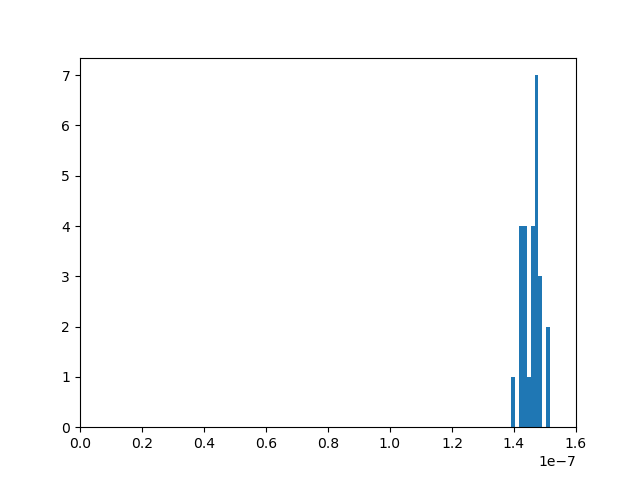

(0.0, 1.6e-07)

In [33]:
fig,ax = plt.subplots()

lst = []
for i in swpdf[swpdf.desc=='B Stochastic'].swpdata[0].runid:
    df = jump_by_id(i)
    if df.I.shape[0]==4:
        lst += [(df.I.iloc[0]-df.I.iloc[2])/2]
    else:
        lst += [np.abs(df.I.sum())]
ax.hist(lst)
ax.set_xlim(0,1.6e-7)

WS: So, questions:

A. Can we interpretate the further drop in I_SW(B) as some field-sensitive process?
B. Can I_SW for dataset B and D be corresponding to the assymetry of our SQUID? (EJ_min)


WS: It seems that we have some fine features around FF (tbh it's probably worth checking the ZF as well.) Let's think about how to extract some information to help investigating the origin of subgap state.

1. Is this feature has higher frequency in terms of B? Anything in the design 6 times larger than the SQUID loop?
2. 

In [ ]:
dic = {'full':,'g':,'f':,'e':,'d':,'c':,'b':174,'a':}
for i in dic:
    nstart = dic[i]
    devid = 'N5'+i
    Blst = np.linspace(1.7,2.1,9)*1e-4

    sweep = {'runid' : np.arange(nstart,nstart+len(Blst),1),
             'Bfield': Blst,
             'T': [63e-3]*len(Blst)}
    swpdt = pd.Series(data = sweep)

    swpd0 = {'devid'  : devid,
             'swpdata': [swpdt],
             'desc'   : 'FF detail'}
    swpd0 = pd.DataFrame(data = swpd0)
    swpdf = swpdf.append(swpd0)

## Fine scan near FF

<IPython.core.display.Javascript object>


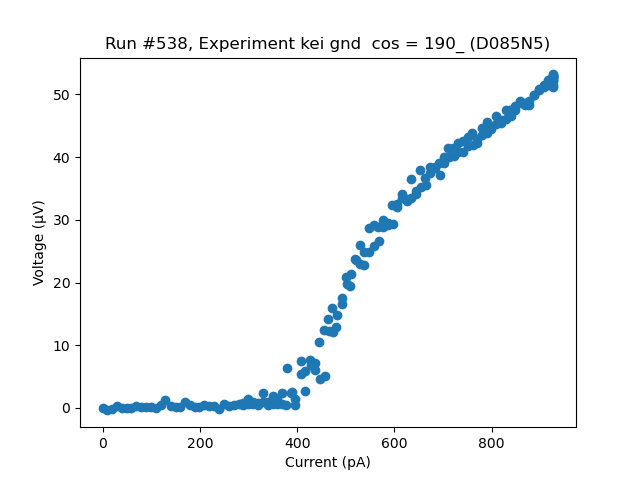

In [36]:
jj.pbi(538, interactive = True)

cos = 0.1

<IPython.core.display.Javascript object>


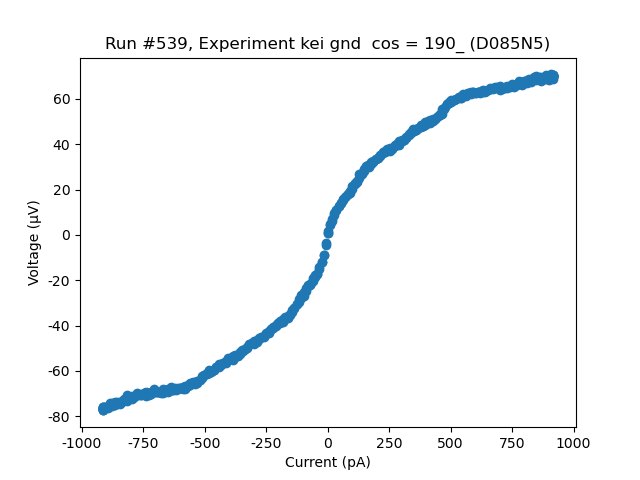

In [37]:
jj.pbi(539, interactive = True)

In [38]:
jj.ZF = -10e-6
jj.FF = 215e-6

jj.B_to_cos(140e-6)

0.5000000000000001

<IPython.core.display.Javascript object>


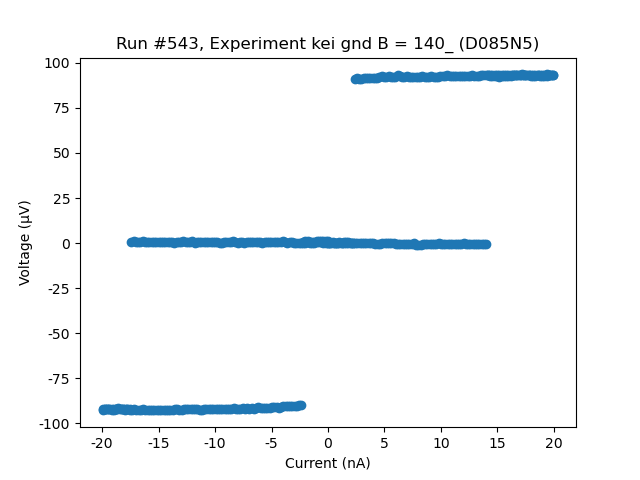

In [39]:
jj.pbi(543, interactive = True)

In [71]:
jj.mock_meas((runid_P, runidlst), (Bfield_tool, Blist))

NameError: name 'Blist' is not defined

In [34]:
# Blst = np.append(np.linspace(150,170,3)*1e-6, (np.linspace(180,230,11)*1e-6)[:3])
# Blst = np.append(Blst, np.linspace(195,200,11)*1e-6)
# Blst = np.append(Blst,(np.linspace(195,230, 9)*1e-6)[2:])
# runidlst = np.append([544,545,546],(range(550, 560+1))[:3])
# runidlst = np.append(runidlst, range(570, 580+1))
# runidlst = np.append(runidlst, range(561, 569+1)[2:])

# devid = 'N5b'
# sweep = {'runid' : runidlst,
#          'Bfield': Blst,
#          'T': [63e-3]*len(Blst)}
# swpdt = pd.Series(data = sweep)
# swpd0 = {'devid'  : devid,
#          'swpdata': [swpdt],
#          'desc'   : 'Bscan fine'}
# swpd0 = pd.DataFrame(data = swpd0)
# swpdf = swpdf.append(swpd0)

In [35]:
Blst = np.append(np.linspace(150,170,3)*1e-6, (np.linspace(180,230,11)*1e-6)[:3])
Blst = np.append(Blst, np.linspace(195,200,11)*1e-6)
Blst = np.append(Blst,(np.linspace(195,230, 9)*1e-6)[2:])
runidlst = np.append([544,545,546],(range(550, 560+1))[:3])
runidlst = np.append(runidlst, range(570, 580+1))
runidlst = np.append(runidlst, range(561, 569+1)[2:])

cos_labs = ['{:.3}'.format(jj.B_to_cos(B)) for B in Blst]
B_labs   = ['{:2.0f}'.format(B*1e6) for B in Blst]

jj.bpbi(runidlst,ls='-', labels = cos_labs)

Exception: Please indicate value of ZF!

closer look at cos = .14 to extract R0 

<IPython.core.display.Javascript object>


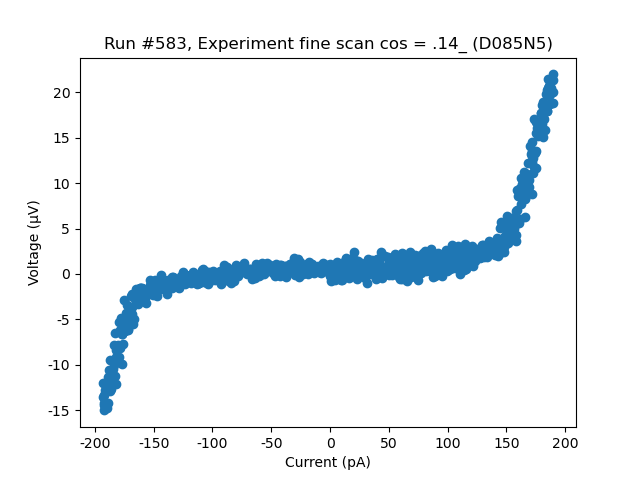

In [40]:
jj.pbi(583, interactive = True)

looking for a minimal cos value whih is still worth to meas. 0.12?

<IPython.core.display.Javascript object>


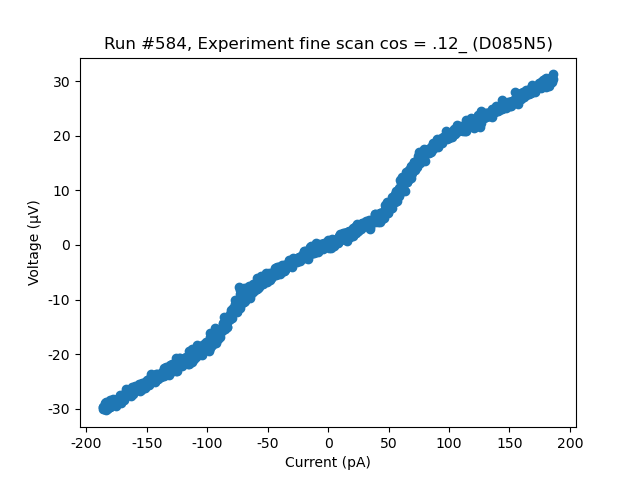

In [42]:
jj.pbi(584, interactive = True)

ok, .12 sounds good

what about upper limit?

<IPython.core.display.Javascript object>


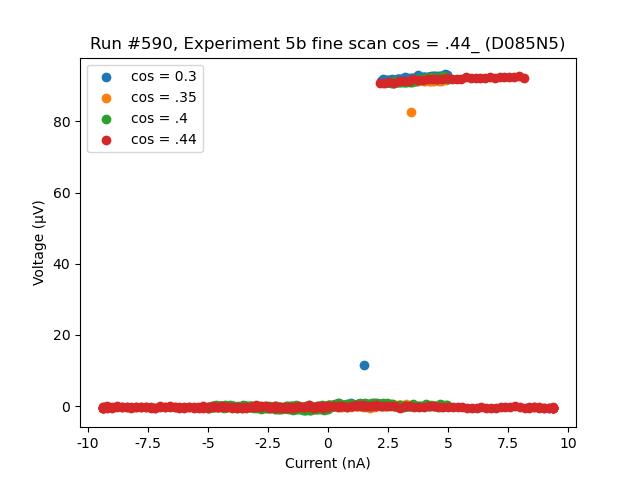

In [41]:
jj.bpbi([585, 586, 587, 590], 
        labels = ['cos = 0.3', 'cos = .35', 'cos = .4', 'cos = .44'])

## coarse Isw(B)

<IPython.core.display.Javascript object>


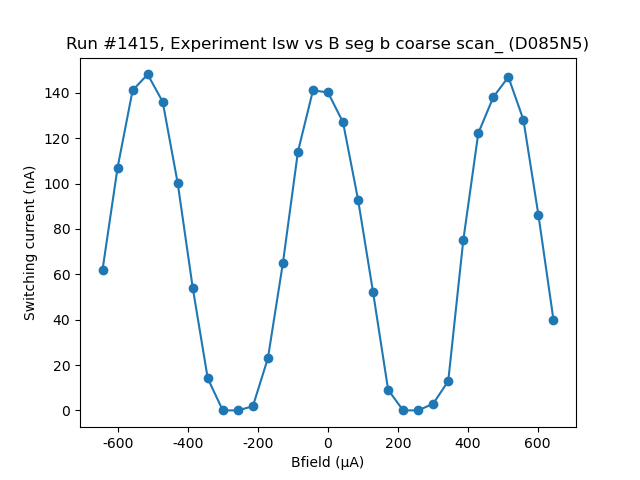

In [43]:
jj.pbi(1415, ls = '-')

## fine Isw(B)

measure different B range with diff stepsize

near FF

<IPython.core.display.Javascript object>


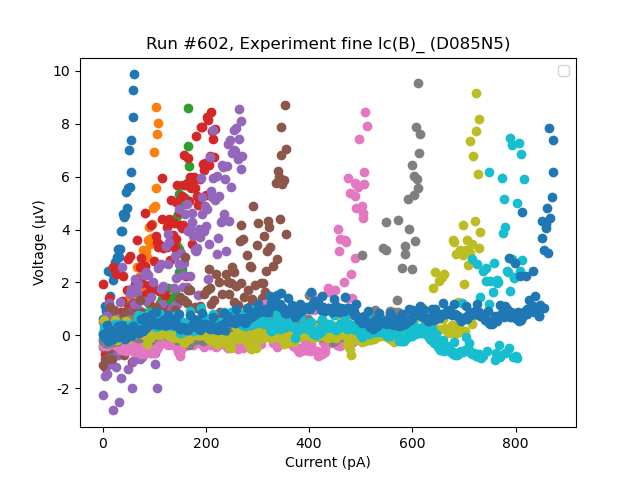

No handles with labels found to put in legend.


In [44]:
jj.bpbi(range(592, 602+1))

mid frust

<IPython.core.display.Javascript object>


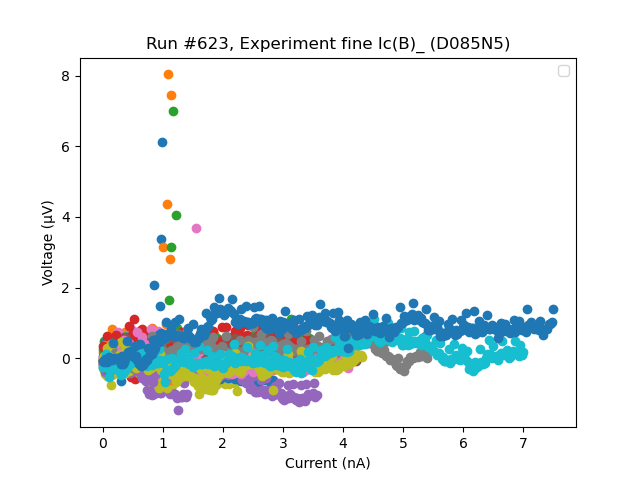

No handles with labels found to put in legend.


In [45]:
jj.bpbi(range(603, 623+1))

near ZF

<IPython.core.display.Javascript object>


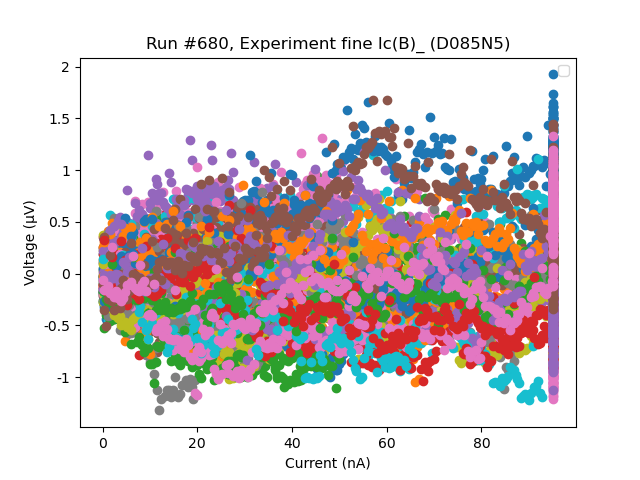

No handles with labels found to put in legend.


In [46]:
jj.bpbi(range(624, 680+1))

wrong kei limit, remeas

<IPython.core.display.Javascript object>


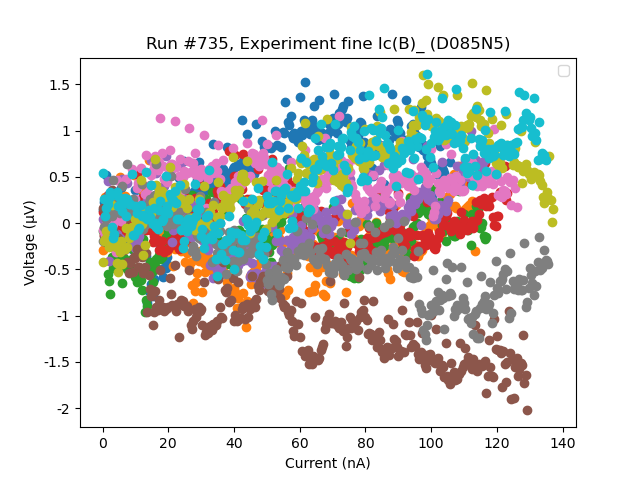

No handles with labels found to put in legend.


In [47]:
jj.bpbi(range(681, 735+1)[-10:])

Isw vs cos

<IPython.core.display.Javascript object>


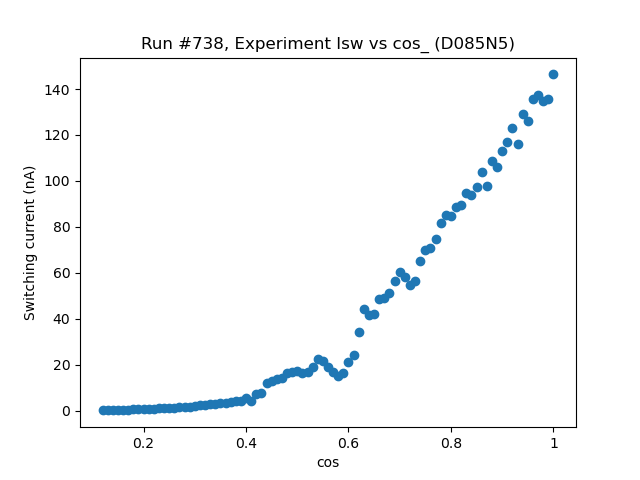

In [48]:
jj.pbi(738)

Isw vs Ej

<IPython.core.display.Javascript object>


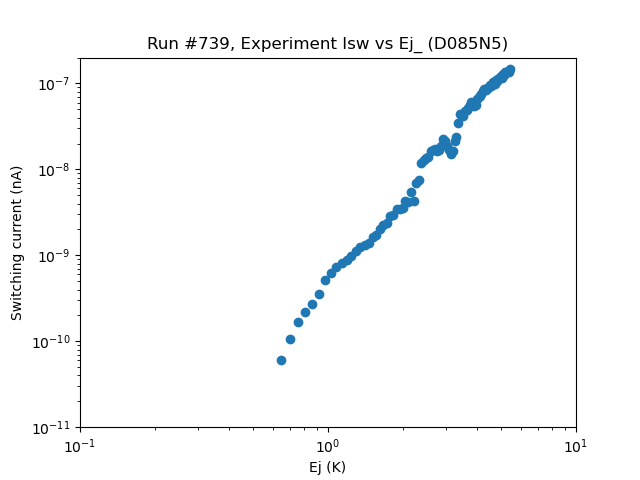

(1e-11, 2e-07)

In [49]:
ax = jj.pbi(739)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-1, 10)
ax.set_ylim(1e-11, 2e-7)

compare with old guy with similar params

In [50]:
jj70N7 = JJmeas(sample = 'D070B1N7')
jj70N7.db_connect()
jj79N6 = JJmeas(sample = 'D079N6')
jj79N6.db_connect()

<IPython.core.display.Javascript object>


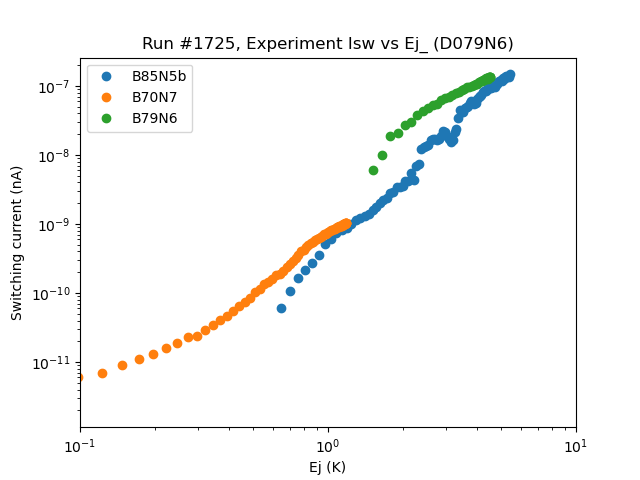

(0.1, 10)

In [51]:
ax = jj.pbi(739, label = 'B85N5b')
jj70N7.pbi(1097, axes = ax, label = 'B70N7')
jj79N6.pbi(1725, axes = ax, label = 'B79N6')

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-1 ,10)

C:\ProgramData\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


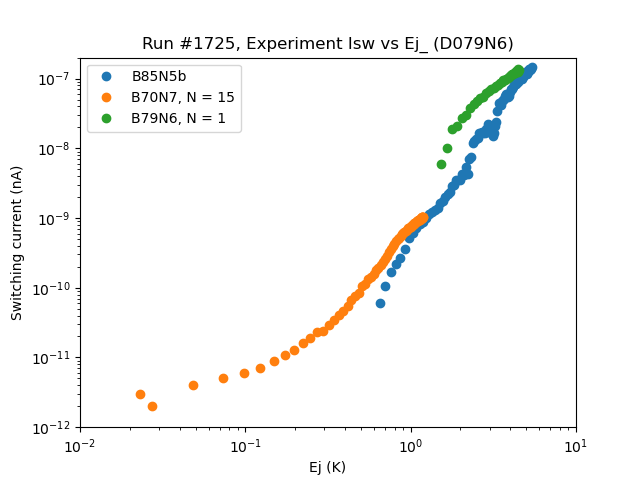

In [52]:
ax = jj.pbi(739, label = 'B85N5b')
jj70N7.pbi(1097, axes = ax, label = 'B70N7, N = 15')
jj79N6.pbi(1725, axes = ax, label = 'B79N6, N = 1')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-2, 10)
ax.set_ylim(1e-12, 2e-7)

ax.legend()


closer to FF we dont see anything useful, just S-shaped curves (mb we saw it before, e.g in B55??) 

In [ ]:
190, s.5, 200 
570, 580+1

In [ ]:
jj.pbi(580)

In [ ]:
np.linspace(195,230,9)

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


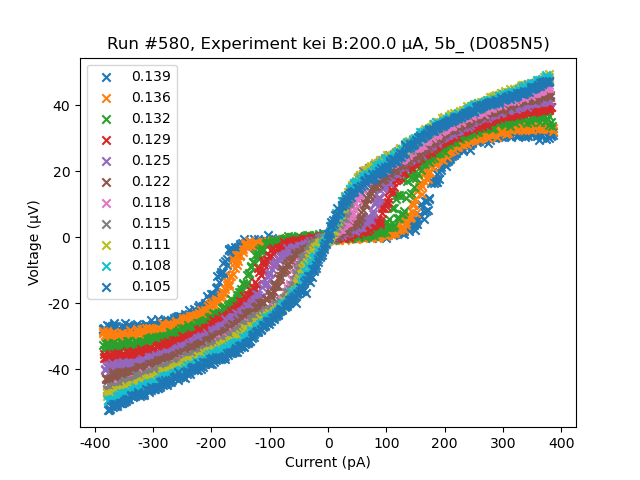

In [53]:
Blst = np.linspace(195,230,9)*1e-6
cos_labs = ['{:.2}'.format(jj.B_to_cos(B)) for B in Blst]
B_labs   = ['{:2.0f}'.format(B*1e6) for B in Blst]
runidlst = range(561,569+1)

Blst = np.linspace(195,200,11)*1e-6
cos_labs = ['{:.3}'.format(jj.B_to_cos(B)) for B in Blst]
B_labs   = ['{:2.0f}'.format(B*1e6) for B in Blst]
runidlst = range(570,580+1)

jj.bpbi(runidlst,ls='-', labels = cos_labs, marker='x')

## JJ 5b

pins 1a 6a

Let's measure just fine IVC for 5b to be able to compare with full chain Isw later on 

C:\ProgramData\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


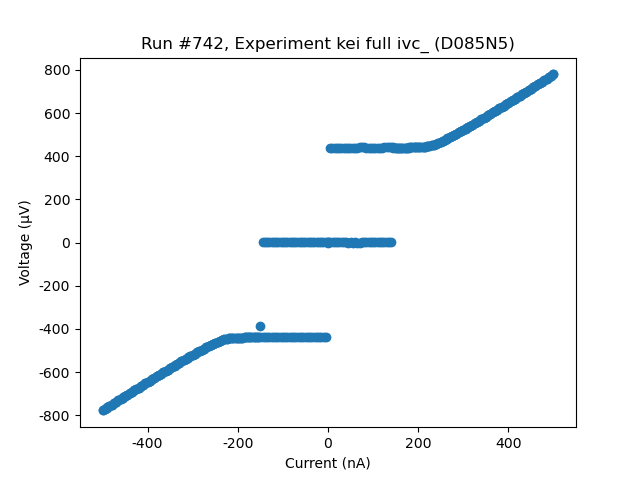

In [54]:
jj.pbi(742, interactive = True)

C:\ProgramData\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


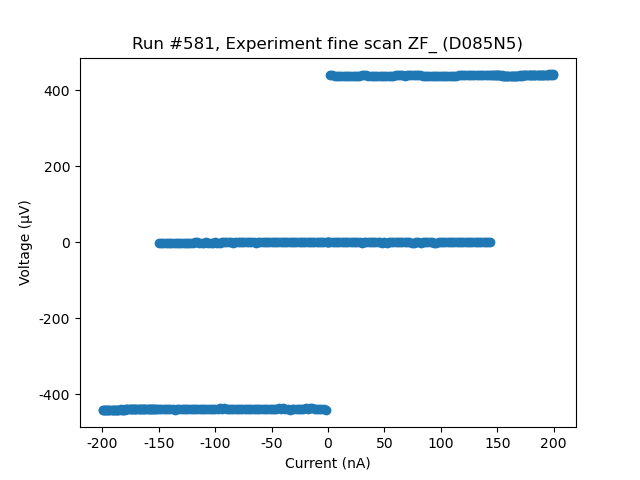

In [55]:
jj.pbi(581)

### hist

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


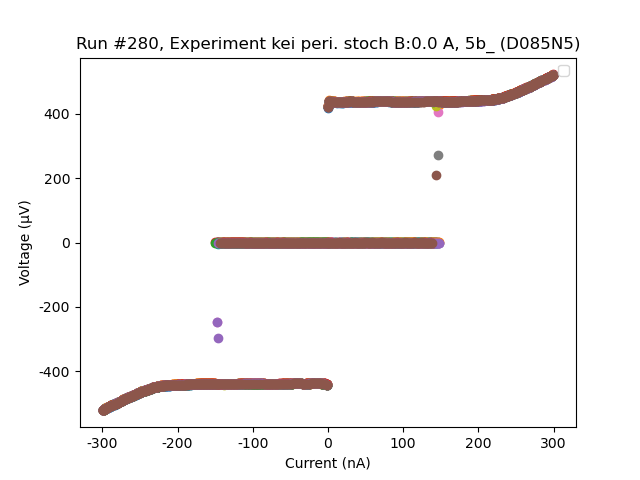

No handles with labels found to put in legend.


In [58]:
ids = swpdf[swpdf.desc=='B Stochastic'].swpdata[0].runid
jj.bpbi(ids)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


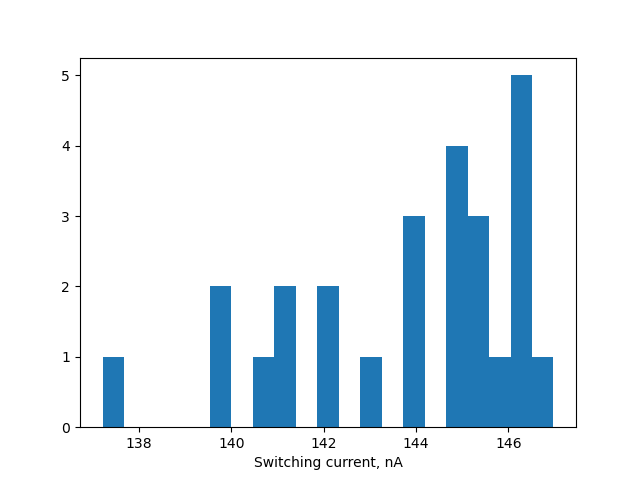

Text(0.5, 0, 'Switching current, nA')

In [59]:
Isws =  jj.Isw_by_id(ids, fullIVC = True, dy = 50e-6)

fig, ax = plt.subplots()

ax.hist(Isws*1e9, bins = 21)

ax.set_xlabel('Switching current, nA')

width ~ 10 nA

### Remeas @ 180uA

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


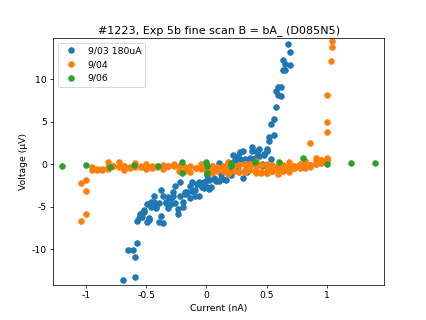

In [361]:
jj.bpbi([938, 1020, 1223], labels = ['9/03 180uA', '9/04', '9/06'])#1221 1223 1224

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


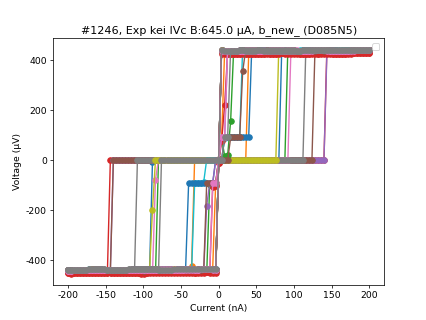

No handles with labels found to put in legend.


In [305]:
jj.bpbi(range(1229,1246+1),ls='-')

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


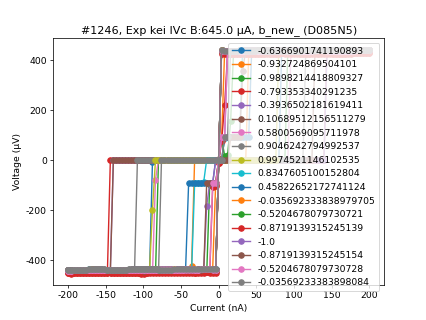

In [288]:
jj.bpbi(range(1229,1246+1), labels =jj.B_to_cos(np.linspace(-3*FF, 3*FF, 19)[1:]), ls='-')
# B = 180e-6, b: 938 old 940

### Look for N-shape  around 225.6uA

<IPython.core.display.Javascript object>


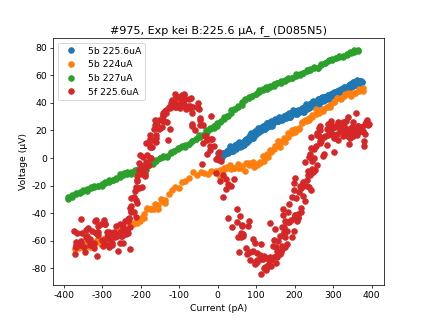

In [70]:
jj.bpbi([1022, 1024, 1025, 975], 
        labels = ['5b 225.6uA', '5b 224uA','5b 227uA', '5f 225.6uA'])

scan 220-230 uA

<IPython.core.display.Javascript object>


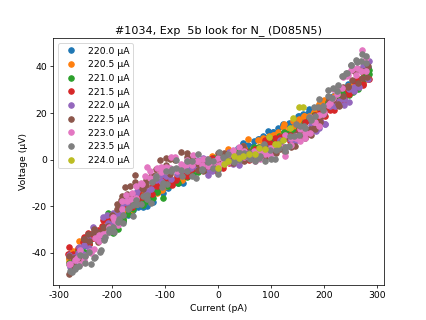

In [85]:
B_list = np.linspace(220e-6, 230e-6, 21)

jj.bpbi(range(1026, 1034+1), labels = [si_format(b)+'A' for b in B_list])

<IPython.core.display.Javascript object>


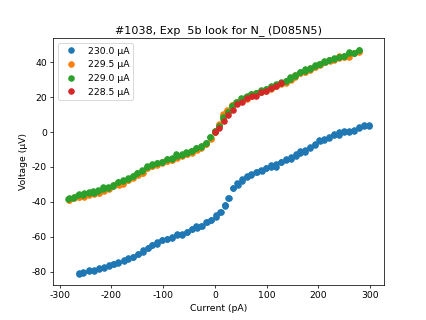

In [90]:
B_list = np.linspace(230e-6, 220e-6, 21)

jj.bpbi(range(1035, 1038+1), labels = [si_format(b)+'A' for b in B_list])

## JJ 5c

pins 1a 5ab

<IPython.core.display.Javascript object>


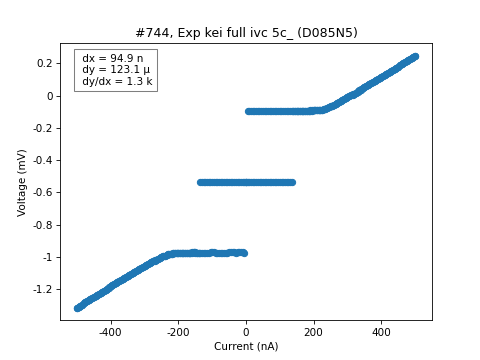

In [1627]:
jj.pbi(744, interactive = True)

<IPython.core.display.Javascript object>


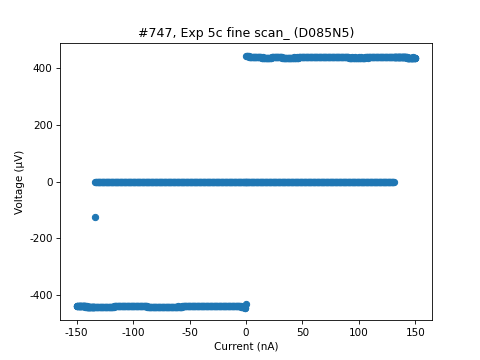

In [1631]:
jj.pbi(747)

## JJ 5d

pins 1b 5b

<IPython.core.display.Javascript object>


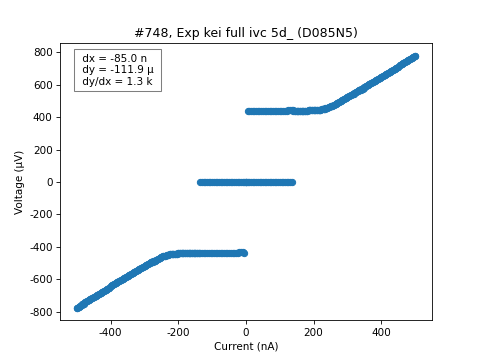

In [1633]:
jj.pbi(748, interactive = True)

<IPython.core.display.Javascript object>


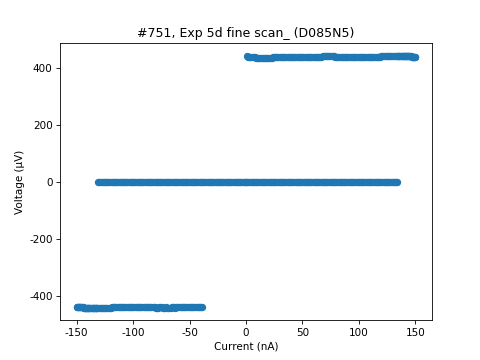

In [1645]:
jj.pbi(751)


## JJ 5e

pins 1b 4b

<IPython.core.display.Javascript object>


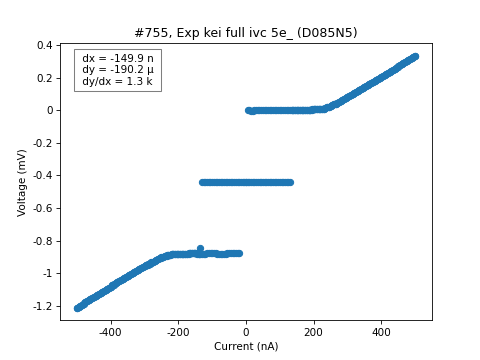

In [1655]:
jj.pbi(755, interactive = True)

<IPython.core.display.Javascript object>


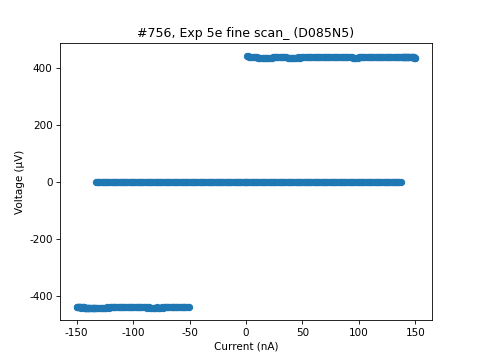

In [1662]:
jj.pbi(756)


## JJ 5f

pins 4b 2a

<IPython.core.display.Javascript object>


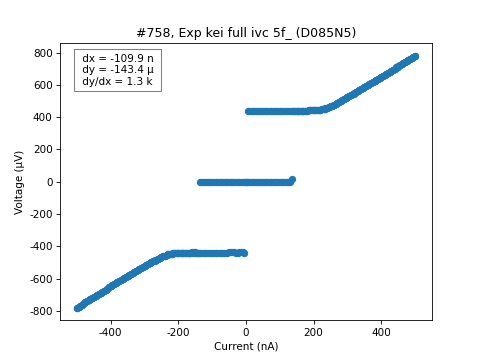

In [1673]:
jj.pbi(758, interactive = True)

<IPython.core.display.Javascript object>


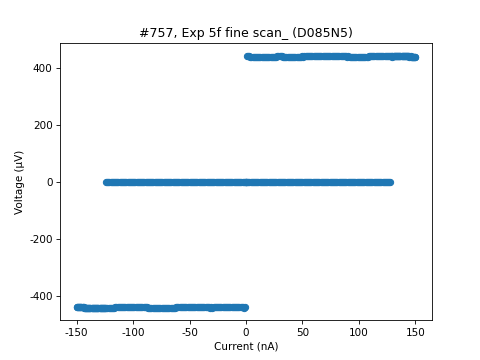

In [1670]:
jj.pbi(757)


<IPython.core.display.Javascript object>


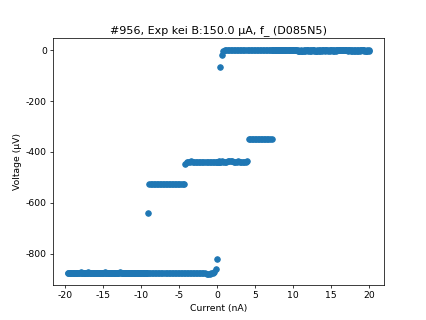

In [1896]:
jj.pbi(956)

In [60]:
# Blst = np.append([150e-6,160e-6,170e-6], np.append(np.linspace(195,200,11)*1e-6,(np.linspace(195,230, 9)*1e-6)[2:]))
# Blst = np.append(Blst, [180e-6,185e-6,190e-6])
# runidlst = range(956,956+len(Blst))

# devid = 'N5f'
# sweep = {'runid' : runidlst,
#          'Bfield': Blst,
#          'T': [63e-3]*len(Blst)}
# swpdt = pd.Series(data = sweep)
# swpd0 = {'devid'  : devid,
#          'swpdata': [swpdt],
#          'desc'   : 'Bscan fine'}
# swpd0 = pd.DataFrame(data = swpd0)
# swpdf = swpdf.append(swpd0)

### N-shape

<IPython.core.display.Javascript object>


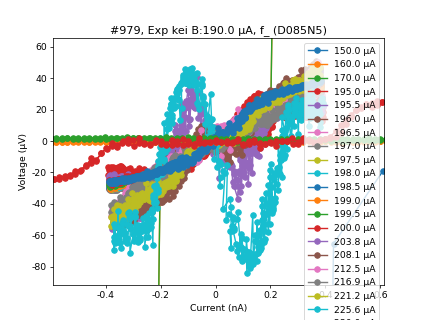

In [55]:
Blst = np.append([150e-6,160e-6,170e-6], np.append(np.linspace(195,200,11)*1e-6,(np.linspace(195,230, 9)*1e-6)[2:]))
Blst = np.append(Blst, [180e-6,185e-6,190e-6])

runidlst = range(956,956+len(Blst))

# cos_labs = ['{:.3}'.format(jj.B_to_cos(B)) for B in Blst]
B_labs   = ['{:2.0f}'.format(B*1e6) for B in Blst]

l = [si_format(b)+'A' for b in Blst]

jj.bpbi(runidlst,ls='-', labels = l)

<IPython.core.display.Javascript object>


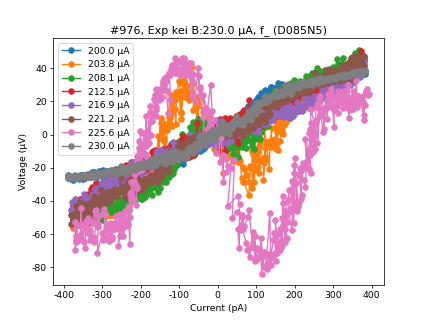

In [39]:
Blst = np.append([150e-6,160e-6,170e-6], np.append(np.linspace(195,200,11)*1e-6,(np.linspace(195,230, 9)*1e-6)[2:]))
Blst = np.append(Blst, [180e-6,185e-6,190e-6])

runidlst = range(956,956+len(Blst))

a, b = 13, 21
# a, b =  1, 13

Blst = Blst[a:b]
runidlst = runidlst[a:b]

cos_labs = ['{:.3}'.format(jj.B_to_cos(B)) for B in Blst]
B_labs   = ['{:2.0f}'.format(B*1e6) for B in Blst]

l = [si_format(b)+'A' for b in Blst]

fig, ax = plt.subplots()
jj.bpbi(runidlst,ls='-', labels = l, ax= ax)
# ax.set_xlim(-400e-12, 400e-12)
# ax.set_ylim(-40e-6, 40e-6)

In [34]:
jj.ZF = -10e-6
jj.FF = 210e-6

In [35]:
jj.B_to_cos(180e-6)

0.21256528955297682

In [1989]:
swpdf

devid                                            swpdata  \
0   N5full  runid                              [18, 19, 20...   
1   N5full  runid                              [25, 26, 27...   
2   N5full  runid              [31, 32, 33, 34, 35, 36, 37...   
3   N5full  runid                   [44, 45, 46]
Bfield   ...   
4      N5a  runid                   [47, 48, 49]
Bfield   ...   
5      N5b  runid                   [50, 51, 52]
Bfield   ...   
6      N5c  runid                   [53, 54, 55]
Bfield   ...   
7      N5d  runid                   [56, 57, 58]
Bfield   ...   
8      N5e  runid                   [59, 60, 61]
Bfield   ...   
9      N5f  runid                   [62, 63, 64]
Bfield   ...   
10     N5g  runid                   [65, 66, 67]
Bfield   ...   
11     N5g  runid                  [68, 69, 70, 71, 72, 73...   
12     N5f  runid                  [77, 78, 79, 80, 81, 82...   
13     N5e  runid                  [86, 87, 88, 89, 90, 91...   
14     N5d  runid         [117, 118, 119, 120, 121, 122, 1...   
15     N5c  runid         [126, 127, 128, 129, 130, 131, 1...   
16     N5b  runid         [135, 136, 137, 138, 139, 140, 1...   
17     N5a  runid         [144, 145, 146, 147, 148, 149, 1...   
18     N5b  runid     [174, 175, 176, 177, 178, 179, 180, ...   
19     N5b  runid     [205, 206, 207, 208, 209, 210, 211, ...   
20     N5b  runid     [255, 256, 257, 258, 259, 260, 261, ...   
21     N5b  runid     [282, 283, 284, 285, 286, 287, 288, ...   
22     N5b  runid     [383, 384, 385, 386, 387, 388, 389, ...   
0      N5b  runid     [544, 545, 546, 550, 551, 552, 570, ...   
0      N5f  runid     (956, 957, 958, 959, 960, 961, 962, ...   

                             desc  
0             sanity check, B dep  
1   sanity check, search FF rough  
2    sanity check, search FF fine  
3                  init check_old  
4                  init check_old  
5                  init check_old  
6                  init check_old  
7                  init check_old  
8                  init check_old  
9                  init check_old  
10                 init check_old  
11                  FF detail_old  
12                  FF detail_old  
13                  FF detail_old  
14                  FF detail_old  
15                  FF detail_old  
16                  FF detail_old  
17                  FF detail_old  
18            B periodicity_rough  
19          B periodicity_near FF  
20                   B stochastic  
21         B periodicity_near -FF  
22          B periodicity_near ZF  
0                      Bscan fine  
0                      Bscan fine

WS: LOLLLLL is that Bloch nose?!

KK More comments pls ))

In [1933]:
Blst = (np.linspace(200,230,31)*1e-6)[:len(rlst)]
cos_labs = ['{:.3}'.format(jj.B_to_cos(B)) for B in Blst]
B_labs   = ['{:2.0f}'.format(B*1e6) for B in Blst]


In [44]:
range(980,1010)[20:]

range(1000, 1010)

<IPython.core.display.Javascript object>


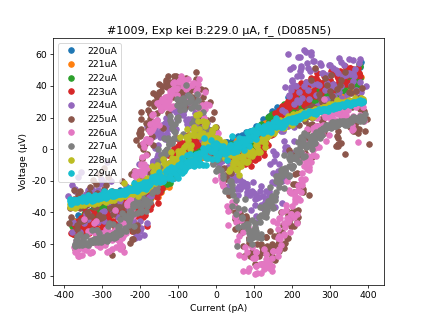

In [43]:
rlst = range(980,1010)[20:]

B_list = (np.linspace(200,230,31)*1e-6)[20:]
jj.bpbi(rlst, labels = ['{:2.0f}uA'.format(B*1e6) for B in B_list])

B = 205 fine wide scan

<IPython.core.display.Javascript object>


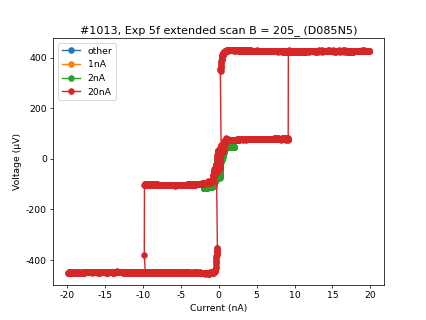

In [45]:
jj.bpbi([1010,1011, 1012, 1013],ls='-',labels = ['229uA','1nA','2nA','20nA'])

WS: One potential theory Kostya has is that maybe the junction f (4b2a) became too resistive and current just flew to somewhere else (V+?). One possible way to check is moving 3a closer to f (4b2a) and see if anything changes.

<IPython.core.display.Javascript object>


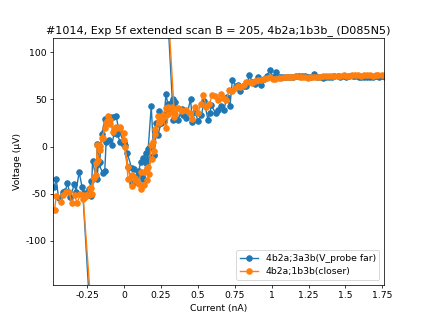

In [1958]:
jj.bpbi([1013,1014],ls='-', labels = ['4b2a;3a3b (V_probe far)','4b2a;1b3b (closer)'])

WS: After double check with pin assignment and move the pin, it doesn't seem to be relevant much. But maybe the extended part (segmanet abcde) were superconducting anyway so we couldn't really tell. Let's review a bit the circuit.

check for diff biasing scheme?

### repeat 225.6uA

<IPython.core.display.Javascript object>


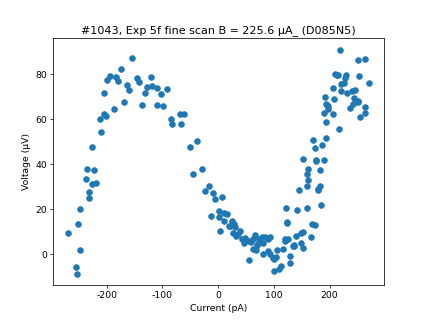

In [107]:
jj.pbi(1043)

## JJ 5b-5f

pins 6a 2a

<IPython.core.display.Javascript object>


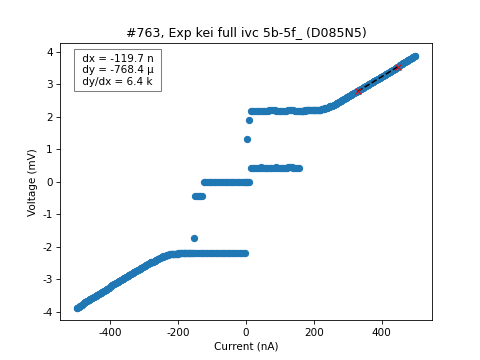

In [1693]:
jj.pbi(763, interactive = True)

asymmetric Isw??

closer look, finer steps

<IPython.core.display.Javascript object>


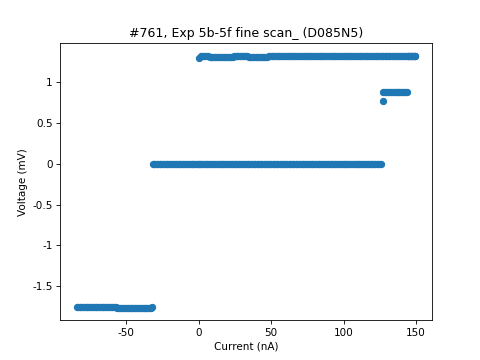

In [1694]:
jj.pbi(761)


also asymmetric, but in another way

repeat?

<IPython.core.display.Javascript object>


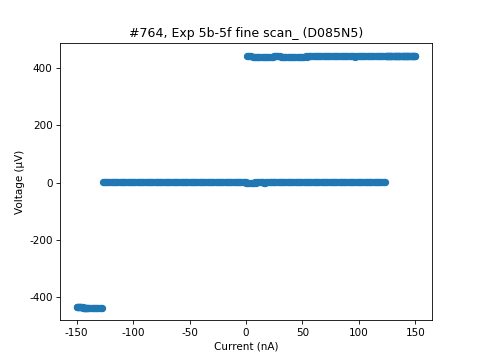

In [1701]:
jj.pbi(764)


<IPython.core.display.Javascript object>


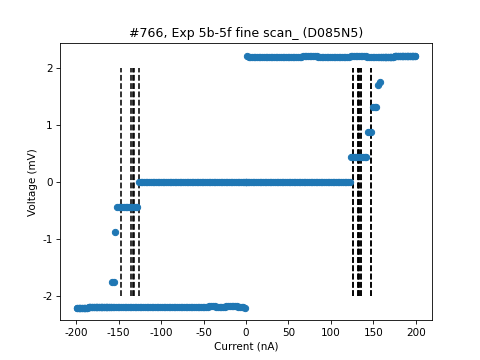

In [1714]:
ax = jj.pbi(766)


<IPython.core.display.Javascript object>


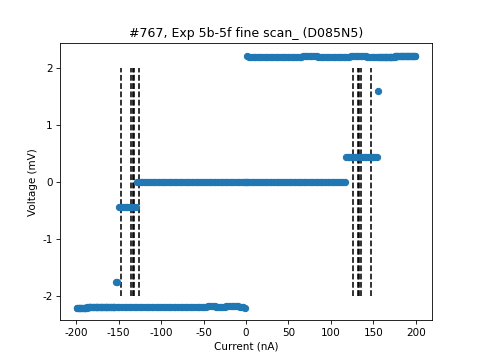

In [1717]:
ax = jj.pbi(767)


<IPython.core.display.Javascript object>


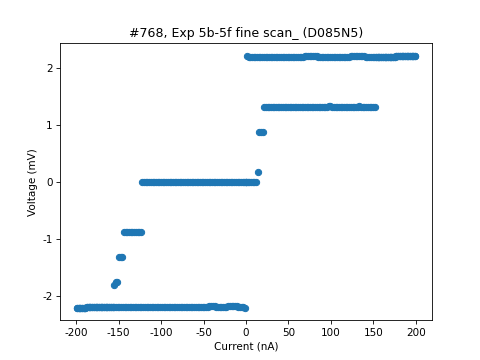

In [1721]:
ax = jj.pbi(768)


just bunch of diff runs 

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


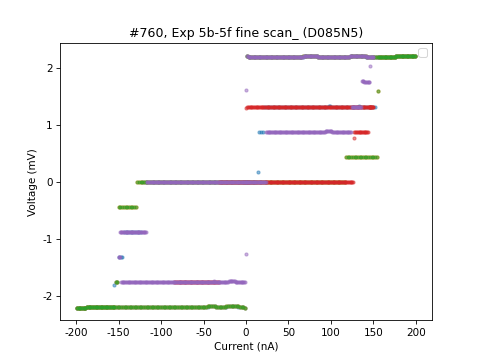

No handles with labels found to put in legend.


In [1724]:
jj.bpbi([768,767, 767, 761, 760], alpha = 0.5, marker = '.')

### Remeas @ 180 uA

<IPython.core.display.Javascript object>


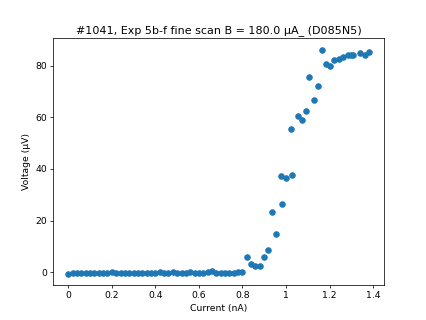

In [95]:
jj.pbi(1041)

### Remeas @ 225.6 uA

is there any N-curve??

<IPython.core.display.Javascript object>


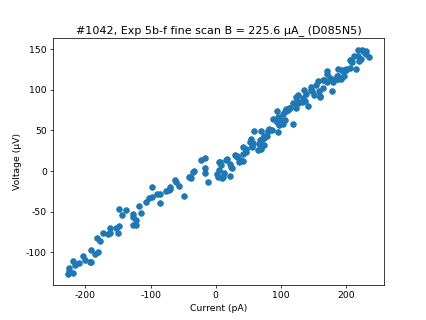

In [102]:
jj.pbi(1042)

## chain vs individual jj

In [1718]:
ids = [581, 747, 751, 756, 757]

Isws =  jj.Isw_by_id(ids, fullIVC = True, dy = 50e-6)

for Isw in Isws:
    ax.vlines(Isw, -2e-3, 2e-3, ls = '--')
    ax.vlines(-Isw, -2e-3, 2e-3, ls = '--')

In [1769]:
ids = [581, 747, 751, 756, 757]

Isws =  jj.Isw_by_id(ids, fullIVC = True, dy = 50e-6)

Isws

array([1.47000032e-07, 1.32234322e-07, 1.32484138e-07, 1.34983057e-07,
       1.25987247e-07])

## Repeat IVc many time, lets see how it's reproducable

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


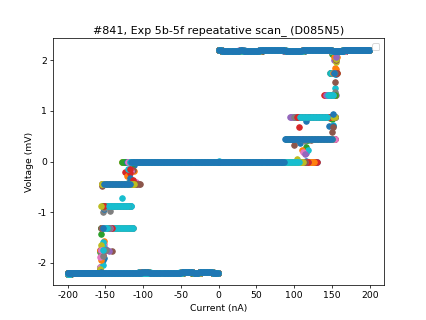

No handles with labels found to put in legend.


In [1748]:
jj.bpbi(range(771, 841+1))

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


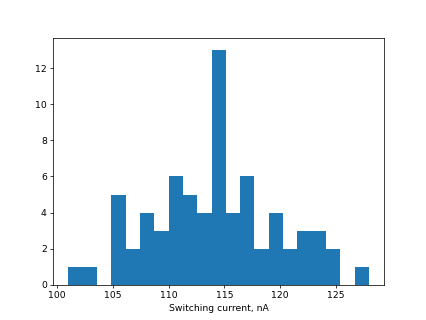

Text(0.5, 0, 'Switching current, nA')

In [1747]:
ids = range(771, 841+1)

Isws =  jj.Isw_by_id(ids, fullIVC = True, dy = 50e-6)

fig, ax = plt.subplots()

ax.hist(Isws*1e9, bins = 21)

ax.set_xlabel('Switching current, nA')

## Bscan for 5b-5f segmant

<IPython.core.display.Javascript object>


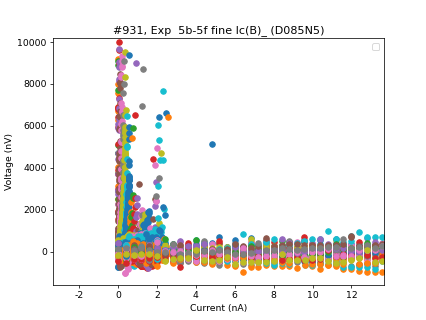

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:703: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(np.abs(data_dict['data']))
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:706: RuntimeWarning: invalid value encountered in less
  if maxval < threshold:
No handles with labels found to put in legend.


In [175]:
jj.bpbi(range(843, 931+1))#931

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, **subplots_kwargs)


<IPython.core.display.Javascript object>


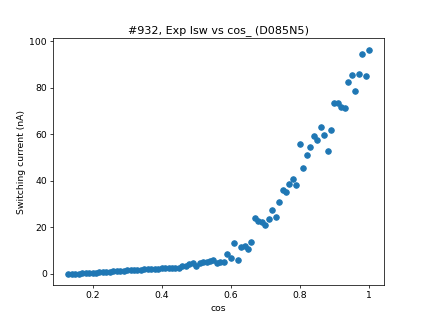

In [1757]:
jj.pbi(932)

compare with 5b

<IPython.core.display.Javascript object>


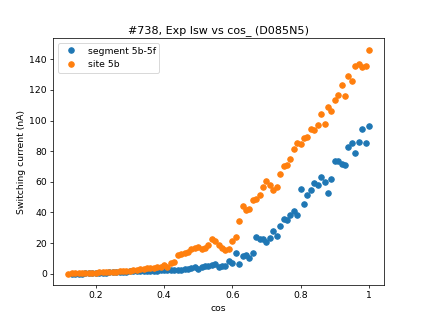

In [1760]:
jj.bpbi([932, 738 ], labels = ['segment 5b-5f', 'site 5b'])

<IPython.core.display.Javascript object>


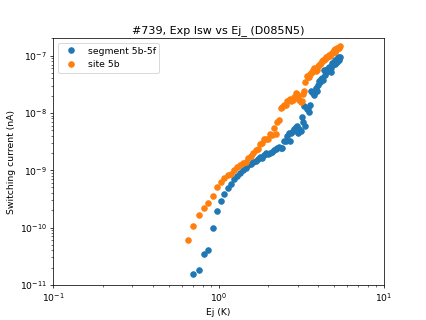

(1e-11, 2e-07)

In [1761]:
ax = jj.bpbi([933, 739 ], labels = ['segment 5b-5f', 'site 5b'])

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1e-1, 10)
ax.set_ylim(1e-11, 2e-7)

## IVC of segment near FF

cos = 0.15

<IPython.core.display.Javascript object>


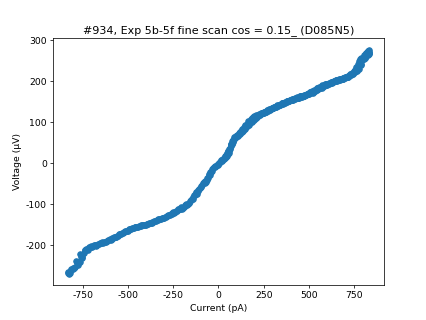

In [1765]:
jj.pbi(934)

B = 190

<IPython.core.display.Javascript object>


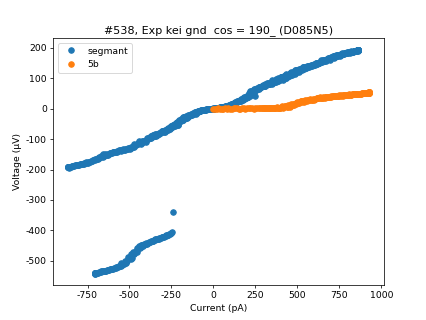

In [1771]:
jj.bpbi([936, 538], labels = ['segmant', '5b'] )

I would also remeasure all sites at some frustration, where Isw is not so stochastic, but still switches are sharp and well visible 

WS: revisit entire N5 sites (abcdefg, b-f) at B=180uA; revisit 5f given that this seems to be the JJ associated with the first jump judging from I_SW at ZF.
- label: devices
- exp var: a,  b,  c,  d,  e,  f,  g,b-f
- runid: 946,938,939,940,942,943,944,954

<IPython.core.display.Javascript object>


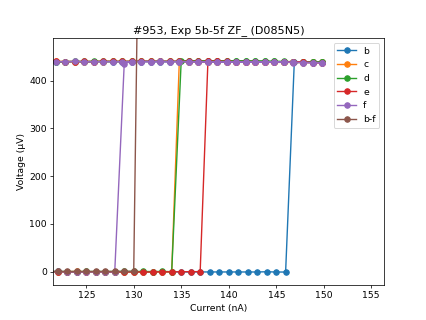

In [1879]:
jj.bpbi([949, 950, 751, 756, 757, 953], labels = ['b','c','d','e','f','b-f'], ls='-')

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


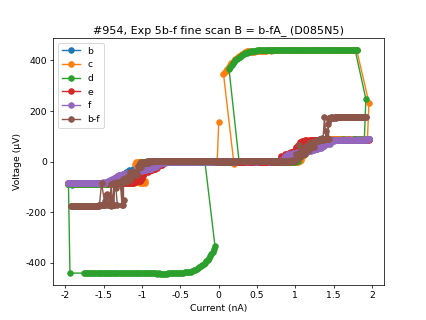

In [277]:
jj.bpbi([1020,939,940,942,943,954], labels = ['b','c','d','e','f','b-f'], ls='-')
# B = 180e-6, b: 938 old 940

## Brief summary after weekly meeting

We have three mystries need to answer before move on to small junction devices.
1. In the part where we tried to identify the "weakest" line, why seg b-f has "better" IVc (less R0, for example) than seg b?!
> remeasure b
2. What is going on with this unphysical negative resistance branch found in seg f near FF?
> check Bscan on other seg, for example seg c.
> think about other biasing scheme to check
> could it be some non-local injection such as unaccounted QP current? How to check?
3. Why the noise level is higher at the s-shape segment?

## Check Bscan on seg c 

<IPython.core.display.Javascript object>


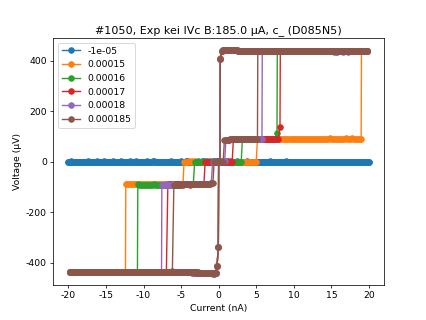

In [136]:
Blst = [-10e-6,150e-6,160e-6,170e-6,180e-6,185e-6,190e-6,215e-6]

jj.bpbi(range(1045, 1051),ls='-',labels = Blst)

In [ ]:
KK: why this range? i would use (200e-6, 230e-6, 61), and reduce the ivc time down to 5 min 
amp = .3n, stp = 10pA ?

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


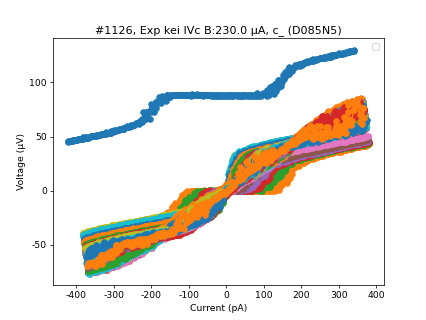

No handles with labels found to put in legend.


In [362]:
Blst = np.append(np.linspace(195,200,11)*1e-6,np.linspace(200,230,61)*1e-6)
rlst = range(1055, 1126+1)

# a = 1106

# Blst = Blst[a-1055:a-1055+9+1]
# rlst = range(a, a+9+1)


jj.bpbi(rlst,ls='-')

WS: Didn't see the S-shape on seg c, but the noisy issue seems to be true. Let's first set some meas on Ic_Bscan for seg c

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


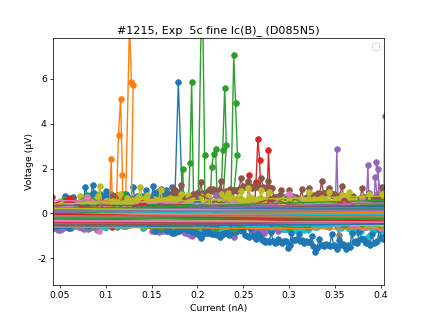

No handles with labels found to put in legend.


In [193]:
jj.bpbi(range(1127, 1215+1),ls='-')#1162

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


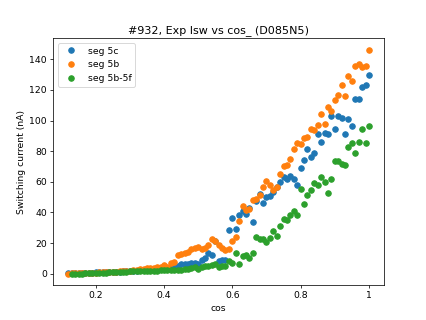

In [195]:
jj.bpbi([1219, 738, 932], labels = ['seg 5c', 'seg 5b', 'seg 5b-5f'])

<IPython.core.display.Javascript object>


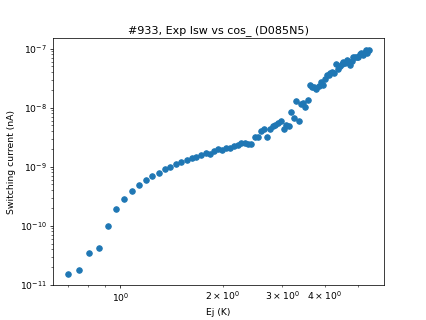

In [63]:
ax = jj.pbi(933, label = 'B85N5b-f')

ax.set_xscale('log')
ax.set_yscale('log')

In [65]:
jj = JJmeas(sample = 'D085N5')
jj.ZF = -10e-6
jj.FF = 210e-6

In [209]:
def loadDB2Bscan(SAMPLE = 'D070B1N5v1', run=1507, 
                 folder = r'../_expdata/Experiments_{}.db'):
    qc.config["core"]["db_location"] = folder.format(SAMPLE)
    [[B, runid]] = get_data_by_id(run)
    Blst, rlst = B['data'], runid['data']
    Isws = [extract_Isw_R0_by_id(rid, dy = 120e-6)[0] for rid in rlst]
    return (Isws, Blst, rlst)

# qc.config["core"]["db_location"] = r'../_expdata/Experiments_{}.db'.format('D079N5')
# jj.cos_to_B( np.linspace(1, 0, 51 ))
# Blst, rlst = jj.cos_to_B(np.linspace(1, 0, 51 )), range(72,122+1)
# Isws = [extract_Isw_R0_by_id(rid, dy = 20e-6)[0] for rid in rlst]

In [210]:
# jj70N5 = {'Isw': [], 'B': [], 'cos': []}
# jj70N5['Isw'], jj70N5['B'], _ = loadDB2Bscan(SAMPLE = 'D070B1N5v1', run=1507)
# jj70N5['cos'] = jj.B_to_cos(jj70N5['B'])
# jj70N5 = pd.DataFrame(jj70N5)

# jj79N5 = {'Isw': [], 'B': [], 'cos': []}
# jj79N5['Isw'], jj79N5['B'], _ = Isws, Blst, rlst
# jj79N5['cos'] = jj.B_to_cos(jj79N5['B'])
# jj79N5 = pd.DataFrame(jj79N5)

jj78N5 = {'Isw': [], 'B': [], 'cos': []}
jj78N5['Isw'], jj78N5['B'], _ = loadDB2Bscan(SAMPLE = 'D078N5', run=382)
jj78N5['cos'] = jj.B_to_cos(jj78N5['B'])
jj78N5 = pd.DataFrame(jj78N5)

# jj70N7 = JJmeas(sample = 'D070B1N7')
# jj70N7.db_connect()
# jj79N6 = JJmeas(sample = 'D079N6')
# jj79N6.db_connect()
# jj85N5 = JJmeas(sample = 'D085N5')
# jj85N5.db_connect()


In [207]:
from JJformulas import *
from meas_util import *
from JJmeasurement import *

# jj = JJmeas(sample = 'D070B1N5v1')
# jj.db_connect()

# runid_P = Parameter(name = 'runid_P', label = 'run id', unit = ' ') 
# Bfield_tool = Parameter(name = 'Bfield', label = 'B field', unit = 'A') 
# ids = range(1264, 1384+1)
# B_list = np.linspace(-.10e-3, .5e-3, 121)

# jj = JJmeas(sample = 'D078N5')
# jj.db_connect()
# jj.ZF = 0
# jj.FF = 210e-6

# runid_P = Parameter(name = 'runid_P', label = 'run id', unit = ' ') 
# EJ = Parameter(name = 'EJ', label = 'EJ', unit = ' ') 
# ids = range(237, 262+1)
# Ej_list = 0.428*np.linspace(1,0,26)

#          [range(237, 262+1),  32e-3,  cos_to_B(np.linspace(1,0,26)),       'fast 6, I_div'],
#          [range(263, 288+1),  32e-3,  cos_to_B(np.linspace(1,0,26)),       'AWG att 1'],
#          [range(289, 314+1),  32e-3,  cos_to_B(np.linspace(1,0,26)),       'AWG att 10'],


jj.mock_meas((runid_P, ids), (EJ, Ej_list))

Starting experimental run with id: 385


385

<IPython.core.display.Javascript object>


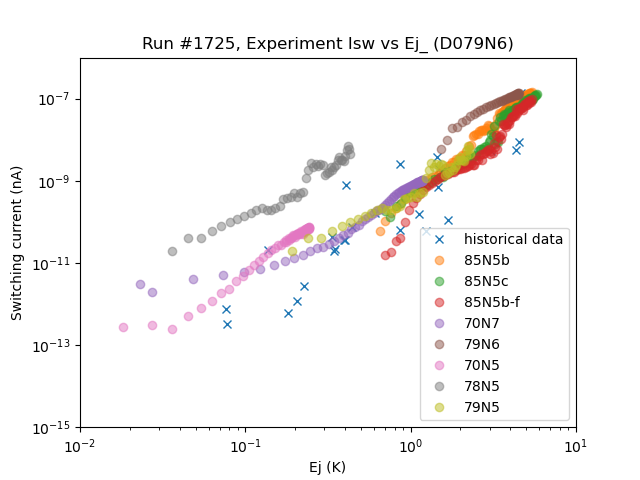

(1e-15, 1e-06)

In [212]:
df = pd.read_csv('../chain table.csv')

fig,ax = plt.subplots()
ax.plot(df.Ej, df.Isw, ls='none',marker = 'x', label = 'historical data')

jj85N5.pbi(739, axes = ax, label = '85N5b', alpha = 0.5)
jj85N5.pbi(1217, axes = ax, label = '85N5c', alpha = 0.5)
jj85N5.pbi(933, axes = ax, label = '85N5b-f', alpha = 0.5)
jj70N7.pbi(1097, axes = ax, label = '70N7', alpha = 0.5)
jj79N6.pbi(1725, axes = ax, label = '79N6', alpha = 0.5)
ax.plot(0.242*jj70N5[jj70N5.cos>0].cos,jj70N5[jj70N5.cos>0].Isw, 
        label = '70N5', marker = 'o', ls = 'none', alpha = 0.5)
ax.plot(0.428*jj79N5[jj79N5.cos>0].cos,jj79N5[jj79N5.cos>0].Isw, 
        label = '78N5', marker = 'o', ls = 'none', alpha = 0.5)
ax.plot(2.288*jj79N5[jj79N5.cos>0].cos,jj79N5[jj79N5.cos>0].Isw, 
        label = '79N5', marker = 'o', ls = 'none', alpha = 0.5)

# ax.plot(np.asarray([10,0.1]),np.asarray([100e-9,0.01e-9])*6.4)
# ax.plot(np.asarray([10,0.1]),np.asarray([100e-9,0.01e-9])*0.64)
# ax.plot(np.asarray([4,0.4]),np.asarray([100e-9,0.01e-9]))

ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.01 ,10)
ax.set_ylim(1e-15 ,1e-6)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


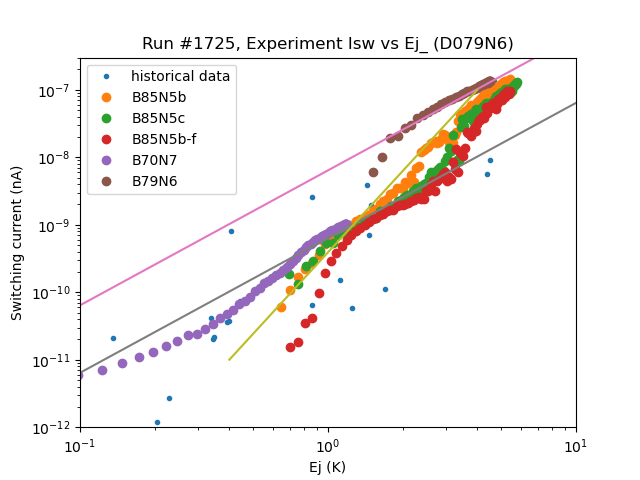

(1e-12, 3e-07)

In [63]:
df = pd.read_csv('../chain table.csv')

fig,ax = plt.subplots()
ax.plot(df.Ej, df.Isw, ls='none',marker = '.', label = 'historical data')



jj85N5.pbi(739, axes = ax, label = 'B85N5b')
jj85N5.pbi(1217, axes = ax, label = 'B85N5c')
jj85N5.pbi(933, axes = ax, label = 'B85N5b-f')
jj70N7.pbi(1097, axes = ax, label = 'B70N7')
jj79N6.pbi(1725, axes = ax, label = 'B79N6')
ax.plot(jj70N5[jj70N5.cos>0].cos,jj70N5[jj70N5.cos>0].Isw, ls = 'none', marker = 'x')



ax.plot(np.asarray([10,0.1]),np.asarray([100e-9,0.01e-9])*6.4)
ax.plot(np.asarray([10,0.1]),np.asarray([100e-9,0.01e-9])*0.64)
ax.plot(np.asarray([4,0.4]),np.asarray([100e-9,0.01e-9]))


ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.01 ,10)
ax.set_ylim(1e-12 ,3e-7)

<IPython.core.display.Javascript object>


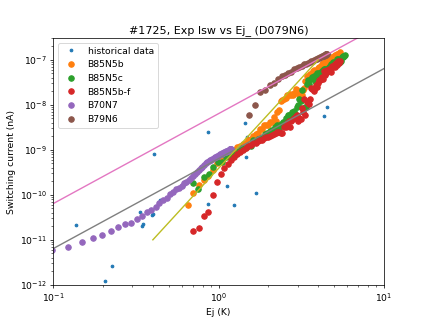

(1e-12, 3e-07)

In [59]:
df = pd.read_csv('../chain table.csv')

fig,ax = plt.subplots()
ax.plot(df.Ej, df.Isw, ls='none',marker = '.', label = 'historical data')

jj.pbi(739, axes = ax, label = 'B85N5b')
jj.pbi(1217, axes = ax, label = 'B85N5c')
jj.pbi(933, axes = ax, label = 'B85N5b-f')
jj70N7.pbi(1097, axes = ax, label = 'B70N7')
jj79N6.pbi(1725, axes = ax, label = 'B79N6')

ax.plot(np.asarray([10,0.1]),np.asarray([100e-9,0.01e-9])*6.4)
ax.plot(np.asarray([10,0.1]),np.asarray([100e-9,0.01e-9])*0.64)
ax.plot(np.asarray([4,0.4]),np.asarray([100e-9,0.01e-9]))


ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-1 ,10)
ax.set_ylim(1e-12 ,3e-7)

It seems that there are some detail structures show that EJ is actually falling faster. Should we check other devices?

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


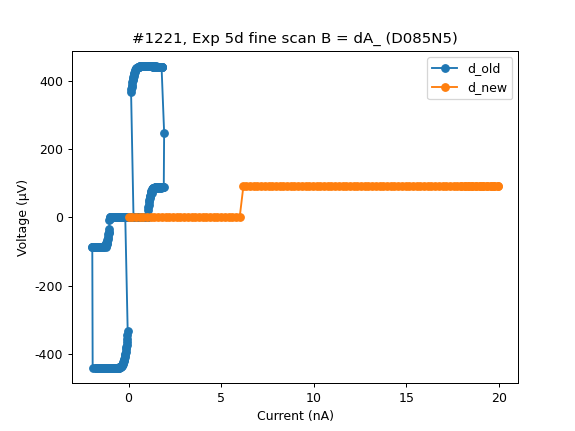

In [378]:
jj.bpbi([940,1221], labels = ['d_old','d_new'], ls='-')

WS: When I switched to seg d I notices a huge improvement on 180uA. I went back to check seg b and noticed the magnet was shifted. Could this actually be the reason of the time dependent background noise we saw?

## Double checking magnet 
WS: sth wrong with the magnet?!

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


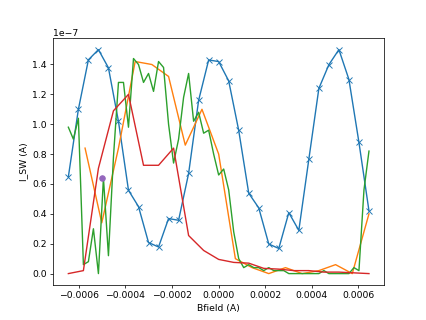

[-0.0005]

In [352]:
fig,ax = plt.subplots()

lslst = ['-','-','-','none']
for i,v in enumerate([2]):
    Blst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.Bfield
    runidlst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.runid

    I_SWlst  = []
    for r in range(len(runidlst)):
        IVdfjump = jump_by_id(runidlst[r], V_thres=200e-6)
        if IVdfjump.shape[0]==4:
            I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
        else:
            I_SWlst += [np.abs(IVdfjump.I).max()]

    ax.plot(Blst,I_SWlst,ls=lslst[i],marker='x')
ax.set_xlabel('Bfield (A)')
ax.set_ylabel('I_SW (A)')


runidlst = range(1229,1246+1)
Isws = [extract_Isw_R0_by_id(rid, dy = 20e-6)[0] for rid in runidlst]
Blst = np.linspace(-3*FF, 3*FF, 19)[1:]
ax.plot(Blst, Isws, label =jj.B_to_cos(Blst), ls='-')

runidlst = range(1253,1313+1)
Isws = [extract_Isw_R0_by_id(rid, dy = 20e-6)[0] for rid in runidlst]
Blst = np.linspace(-3*FF, 3*FF, 61)[:len(runidlst)]
ax.plot(Blst, Isws, label =jj.B_to_cos(Blst), ls='-')

runidlst = range(1314,1334+1)
Isws = [extract_Isw_R0_by_id(rid, dy = 20e-6)[0] for rid in runidlst]
Blst = np.linspace(-3*FF, 3*FF, 21)[:len(runidlst)]
ax.plot(Blst, Isws, label =jj.B_to_cos(Blst), ls='-')

runidlst = [1335]
Isws = [extract_Isw_R0_by_id(rid, dy = 20e-6)[0] for rid in runidlst]
Blst = [-500e-6]
ax.plot(Blst, Isws, label =jj.B_to_cos(-500e-6), ls='-',marker = 'o')

<IPython.core.display.Javascript object>


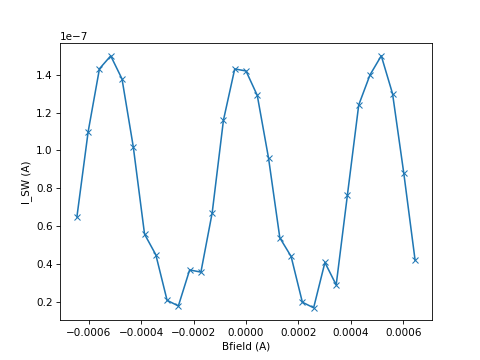

Text(0, 0.5, 'I_SW (A)')

In [71]:
fig,ax = plt.subplots()

lslst = ['-','-','-','none']
for i,v in enumerate([2]):
    Blst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.Bfield
    runidlst = swpdf[swpdf.devid=='N5b'].iloc[v].swpdata.runid

    I_SWlst  = []
    for r in range(len(runidlst)):
        IVdfjump = jump_by_id(runidlst[r], V_thres=200e-6)
        if IVdfjump.shape[0]==4:
            I_SWlst += [(IVdfjump.iloc[0].I-IVdfjump.iloc[2].I)/2]
        else:
            I_SWlst += [np.abs(IVdfjump.I).max()]

    ax.plot(Blst,I_SWlst,ls=lslst[i],marker='x')
ax.set_xlabel('Bfield (A)')
ax.set_ylabel('I_SW (A)')

In [73]:
np.savetxt("I_B_data.txt",[Blst,I_SWlst])

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


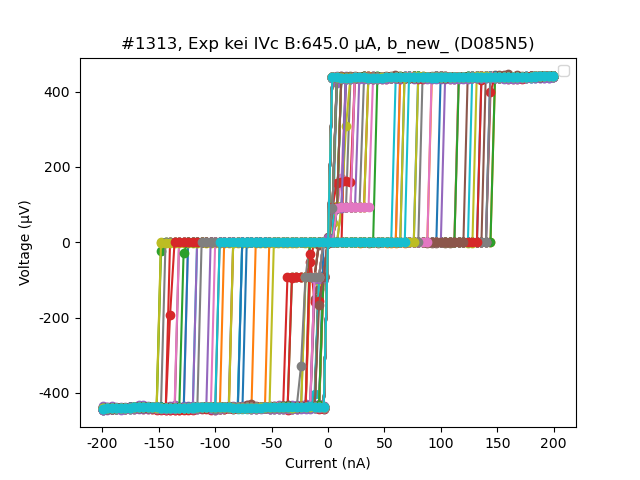

No handles with labels found to put in legend.


In [383]:
jj.bpbi(range(1253,1313+1)[1:],ls='-')

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


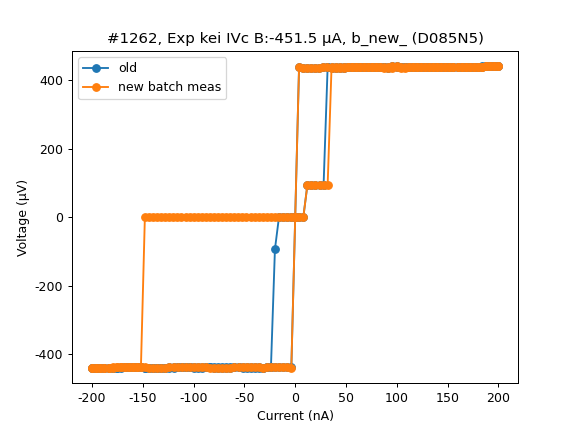

In [374]:
jj.bpbi([1261,1262],ls='-',labels=['old','new batch meas','single shot'])

..\..\_jjtools\JJ_data_processing.py:165: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


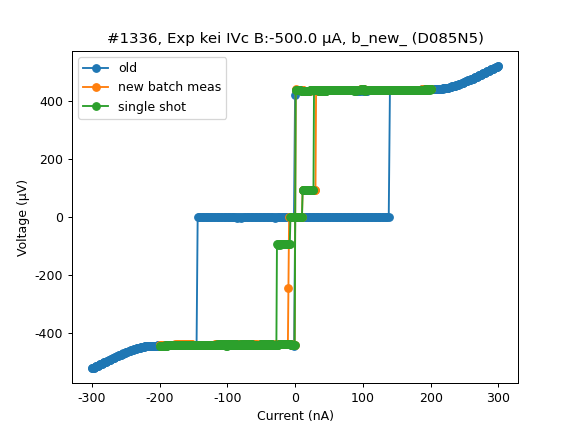

In [363]:
jj.bpbi([280,1324,1336],ls='-',labels=['old','new batch meas','single shot'])

<IPython.core.display.Javascript object>


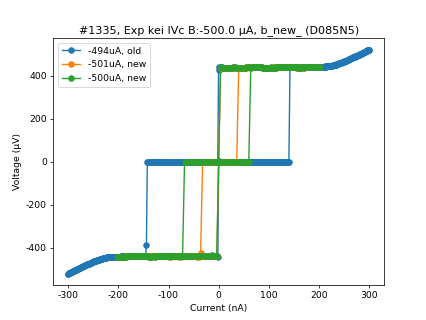

In [428]:
jj.bpbi([swpdf[swpdf.devid=='N5b'].iloc[2].swpdata.runid[2],1230,1335], labels=['-494uA, old','-501uA, new','-500uA, new'],ls='-')

KK remeasure seg b, B = 0 to compare with old result

<IPython.core.display.Javascript object>


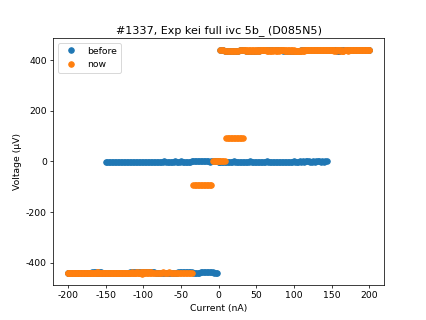

In [427]:
jj.bpbi([581, 1337], labels = ['before', 'now'])

is that premature switching? do we expect max @ -300uA according to WS's measurements? 

IVC @ -300uA

<IPython.core.display.Javascript object>


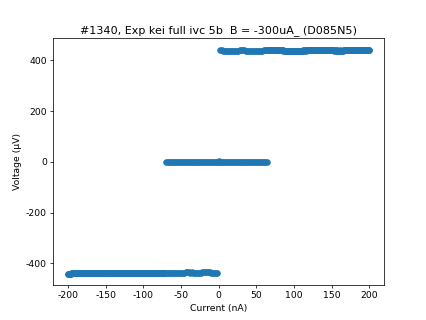

In [426]:
jj.pbi(1340)

not a maximum, but quite a large Isw.

try 180uA to compare with expected Isw = 1nA

<IPython.core.display.Javascript object>


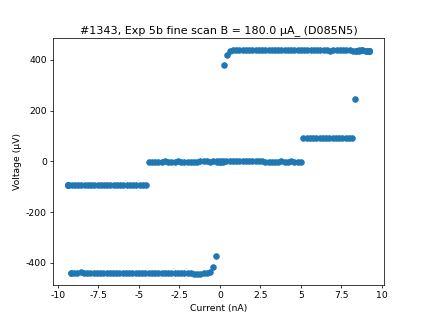

In [425]:
jj.pbi(1343)

symmetric, Isw = 5 nA, much more than before 

<IPython.core.display.Javascript object>


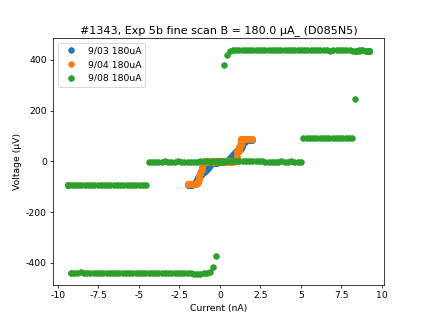

In [29]:
jj.bpbi([938, 1020, 1343], labels = ['9/03 180uA', '9/04 180uA', '9/08 180uA'])

accurately remeasure Isw(B)? then warm up if screwed up 

<IPython.core.display.Javascript object>


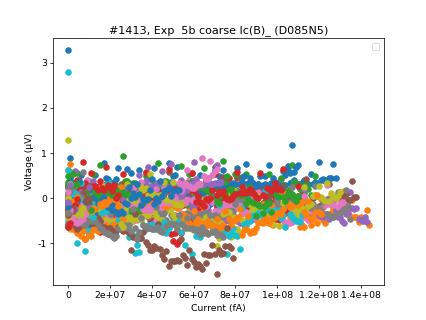

No handles with labels found to put in legend.


In [423]:
jj.bpbi(range(1363, 1413+1))

<IPython.core.display.Javascript object>


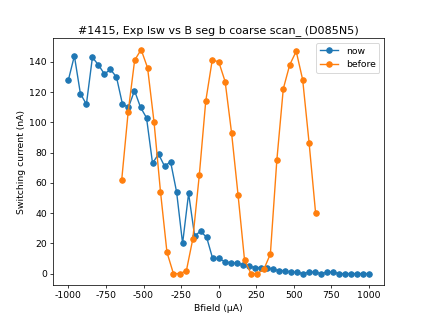

In [422]:
jj.bpbi([1414, 1415], ls = '-', labels = ['now', 'before'])

yes, period is much larger if any, hard even to measure with current Bfield range

## remeas whole chain with bad magnet

<IPython.core.display.Javascript object>


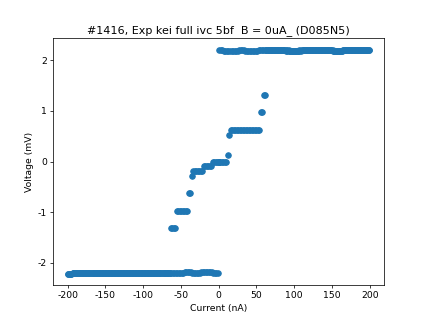

In [431]:
jj.pbi(1416)

at B = 0 Isw is suppressed

check max at -750 uA from id 1414

<IPython.core.display.Javascript object>


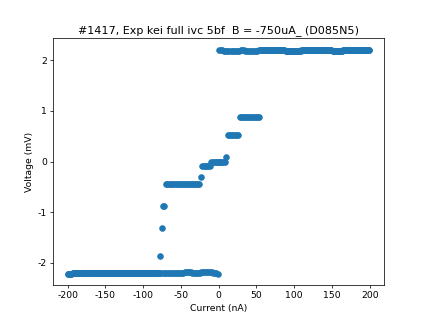

In [435]:
jj.pbi(1417)

not really. have to remeasure full Isw(B)

<IPython.core.display.Javascript object>


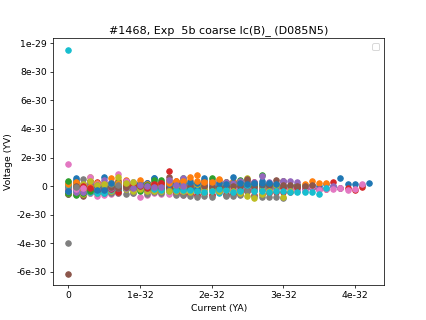

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:703: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(np.abs(data_dict['data']))
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:706: RuntimeWarning: invalid value encountered in less
  if maxval < threshold:
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:703: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(np.abs(data_dict['data']))
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:706: RuntimeWarning: invalid value encountered in less
  if maxval < threshold:
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:703: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(np.abs(data_dict['data']))
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\plotting.py:706: RuntimeWarning: invalid value encountered in less
  if maxval < threshold:
C:\Users\KelvinOX25\Anaco

In [438]:
jj.bpbi(range(1418, 1468+1))

<IPython.core.display.Javascript object>


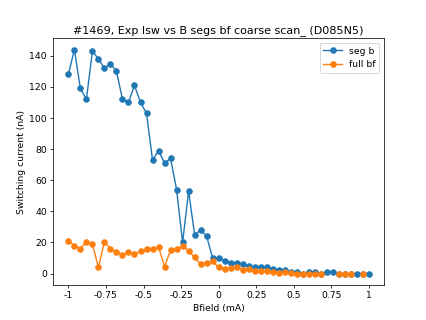

In [440]:
jj.bpbi([1414, 1469], ls = '-', labels = ['seg b', 'full bf'])

## Even after warm up the IVc is different

<IPython.core.display.Javascript object>


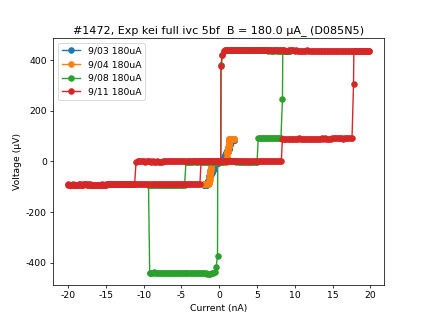

In [34]:
jj.bpbi([938, 1020, 1343, 1472], ls='-', labels = ['9/03 180uA', '9/04 180uA', '9/08 180uA', '9/11 180uA'])

Let's take a look on the rest of the devices before move on to small area JJs.

**KK so warm up doesn't help? We expected Isw = 1nA @ 180uA? Remeas Isw(B)??**

<IPython.core.display.Javascript object>


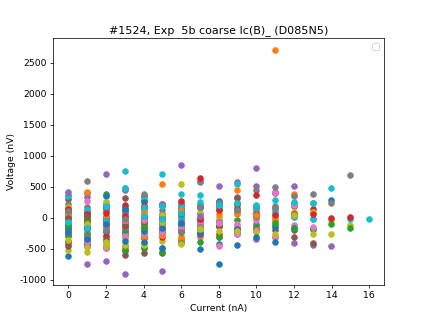

No handles with labels found to put in legend.


In [36]:
jj.bpbi(range(1474, 1524+1))

<IPython.core.display.Javascript object>


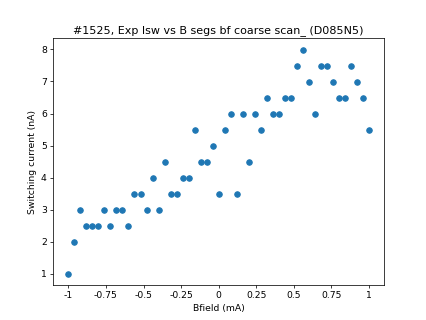

In [37]:
jj.pbi(1525)

is Isw that small for all B?? meas single curve @ B = 0

<IPython.core.display.Javascript object>


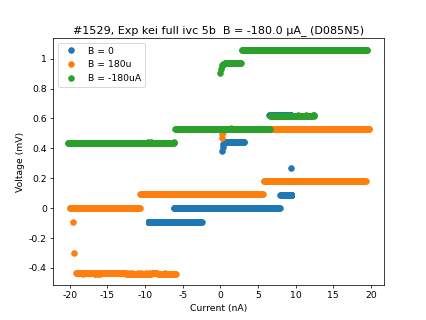

In [48]:
jj.bpbi([1526, 1528, 1529], labels = ['B = 0', 'B = 180u', 'B = -180uA'])

# Temp notes

## status on 9/04

V 3ab
I 1a5b

5c

<IPython.core.display.Javascript object>


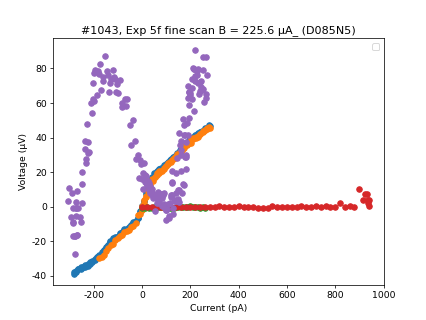

No handles with labels found to put in legend.


In [132]:
jj.bpbi([1037,1038,1039,1040,1043])

Questions regarding toolbox:
1. What will be the system we use for tracking the meas parameter table (runid table)?
2. Are we primarly using IVC_udu? Any wrap around on Bscan and Tscan?
3. plotting/data extraction features? pbi, bpbi, IcR0 extraction, anything else?
4. Add time cost feature to IVC_udu

In [ ]:
# voltage leads:
# 3a                   3b

# current leads:
# 6b 6a 1a 5b 1b 4b 2a 2b
#   5  1  1  1  1  1  4   (number of SQUIDs in bewteen adjacent leads)
#   a  b  c  d  e  f  g   (dev label followed from Plamen's convention)

In [ ]:
# fig,ax = plt.subplots()

# Blst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.Bfield
# runidlst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.runid

# Vavglst = []
# VgapPlst = []
# VgapNlst = []
# for i in range(len(runidlst)):
#     I, V = xy_by_id(runidlst[i])
#     Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
#     Vavglst += [Vavg]
#     VgapPlst += [V[len(V)//4] - Vavg]
    
# ax.plot(Blst, Vavglst, ls='none', marker='x')
# ax.plot(Blst, VgapPlst, ls='none', marker='x')

# fig,ax = plt.subplots(1,2,figsize=(10,4))
# for i in runidlst:
#     if i !=138:
#         I, V = xy_by_id(i)
# #         Vavg = (V[len(V)//4]+V[3*len(V)//4])/2
#         ax[0].plot(I,V-V[0],ls='-',marker='x')
#         ax[1].plot(I,V-V[len(V)//4],ls='-',marker='x')
        
        
        
# ############################
# fig,ax = plt.subplots()

# Blst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.Bfield
# runidlst = swpdf[swpdf.devid=='N5b'].iloc[1].swpdata.runid

# x =4
# I,V = xy_by_id(runidlst[x])
# Vavg = (V[len(V)//4]+V[len(V)//4*3])/2
# IVdf = pd.DataFrame(data = {'I':I, 'V':V-Vavg})
# ax.plot(I,V-Vavg,marker='o',ls='-')

# # IVdfjump = IVdf[np.abs(IVdf.diff().V) < 200e-6]
# # IVdfjump = IVdfjump[np.abs(IVdfjump.diff().V) >= 50e-6]
# IVdfjump = IVdf[np.abs(IVdf.diff().V) > 20e-6]
# print(IVdfjump)
# # IVdfjump = IVdfjump[np.abs(IVdfjump.diff().V) < 200e-6]
# ax.plot(IVdfjump.I,IVdfjump.V,marker='x',ls='none')

# Attempts solving the deep data selection issue

WS: In this file I tried to batched up runids for each measurment (sweeeping Bfield to find FF is one measurment, for example) into a pd.DataFrame called 'swpdf', and information withing each measurment are stored in this swpdf as a pd.Series, 'swpdt'.

The main idea is since we do not necessary sweep the same things everytime (sometimes sweep T, sometimes sweep Bfield etc.), so let's package whatever we have in one pd.Series.

In [ ]:
for i in range(swpdf.shape[0]):
    print(swpdf.iloc[i].swpdata['Bfield'])
    
for i in range(swpdf.shape[0]):
    a = swpdf.iloc[i].swpdata
    lst = []
    for s in a.index.to_list():
        lst += [s, a[s]]

    dic = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}    
    a = pd.DataFrame(data = dic)
    print(a[a['Bfield']==40e-6]['runid'])